In [6]:
import pandas as pd

def extract_location(description):
    # Cette fonction est un exemple et doit être adaptée selon le format des descriptions
    # Recherchez des motifs spécifiques ou des mots clés pour extraire les lieux
    words = description.split()
    locations = [word for word in words if "place" in word or "city" in word]  # Exemple simpliste
    return ", ".join(locations)

# Charger le fichier CSV
data = pd.read_csv('./TempCSV/actualites.csv', delimiter=';', quotechar='"', encoding='utf-8')




# Afficher le tableau
data.head()


,id,lang,title,type,description,linkType,link,titlePage,textPage,buttonText,createdDate,updatedDate,textpage_brute
0,pour-cause-de-travaux-certaines-lignes-et-cert...,fr-fr,🚧 Travaux durant les vacances scolaires,0,"Pour cause de travaux, certaines lignes et sta...",2,https://me-deplacer.iledefrance-mobilites.fr/b...,Les perturbations des vacances,"<div> <img src=""https://primb2c.cdn.prismic.io...",En savoir plus,2024-04-05T12:00:01+0000,2024-04-15T07:15:06+0000,Lignes de métro La Défense / Château de Vinc...


In [11]:
import pandas as pd

def load_and_filter_data(filepath, start_date, end_date):
    # Charger le fichier CSV
    data = pd.read_csv(filepath, delimiter=';', quotechar='"', encoding='utf-8')
    
    # Convertir les colonnes de dates en datetime
    data['createdDate'] = pd.to_datetime(data['createdDate'])
    data['updatedDate'] = pd.to_datetime(data['updatedDate'])
    
    # Filtrer les données entre deux dates
    filtered_data = data[(data['createdDate'] >= start_date) & (data['createdDate'] <= end_date)]
    
    return filtered_data

def display_information(data):
    # Afficher les informations pertinentes
    for index, row in data.iterrows():
        print(f"Titre: {row['title']}")
        print(f"Description: {row['description']}")
        print(f"Date de création: {row['createdDate']}")
        print(f"Date de mise à jour: {row['updatedDate']}")
        print(f"Lien: {row['link']}")
        print(f"Type de lien: {row['linkType']}")
        print(f"Texte brut de la page: {row['textpage_brute'][:500]}...")  # Affiche les 100 premiers caractères du texte brut
        print("-----\n")

# Chemin du fichier CSV
file_path = './TempCSV/actualites.csv'

# Dates de début et de fin pour le filtre
start_date = '2024-04-01'
end_date = '2024-04-30'

# Charger les données filtrées
filtered_data = load_and_filter_data(file_path, start_date, end_date)

# Afficher les informations extraites
display_information(filtered_data)


Titre: 🚧 Travaux durant les vacances scolaires
Description: Pour cause de travaux, certaines lignes et stations sont fermées ces vacances scolaires du 06 au 21/04. 
Avant de vous déplacer, pensez à bien vérifier l'état du trafic sur votre ligne.
Date de création: 2024-04-05 12:00:01+00:00
Date de mise à jour: 2024-04-15 07:15:06+00:00
Lien: https://me-deplacer.iledefrance-mobilites.fr/banner/pour-cause-de-travaux-certaines-lignes-et-certaines11121
Type de lien: 2
Texte brut de la page: Lignes de métro   La Défense / Château de Vincennes   Le 21/04 jusqu'à 12h : Trafic interrompu sur l'ensemble de la ligne en raison de travaux.      Bagneux-Lucie Aubrac / Porte de Clignancourt   Le 21/04 jusqu'à 12h : Trafic interrompu sur l'ensemble de la ligne en raison de travaux.      Bobigny Pablo Picasso / Place d'Italie   Jusqu'au 17 avril, la station Gare d'Austerlitz n'est pas desservie en raison de travaux. Pour plus d'informations, cliquez ici.      Charles de Gaulle – Etoile / Natio...
-----

### Trafic.csv

In [16]:
df_2013 = pd.read_csv("./TempCSV/trafic2013.csv", delimiter=';')
df_2013.head()

,Rang,Réseau,Station,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris
0,12,Métro,OPERA,12269711,3,7,8,NaN,NaN,Paris,9.0
1,13,Métro,HOTEL DE VILLE,11953352,1,11,NaN,NaN,NaN,Paris,4.0
2,19,Métro,NATION,9541406,1,2,6,9.0,NaN,Paris,12.0
3,25,Métro,SAINT-MICHEL,8797595,4,NaN,NaN,NaN,NaN,Paris,5.0
4,20,Métro,PALAIS-ROYAL,9385220,1,7,NaN,NaN,NaN,Paris,1.0


In [17]:
df_2021 = pd.read_csv("./TempCSV/trafic2021.csv", delimiter=';')
df_2021.head()

,Rang,Réseau,Station,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris
0,6,Métro,BIBLIOTHEQUE,11104474,14,NaN,NaN,NaN,NaN,Paris,13.0
1,10,Métro,CHATELET,8350794,1,4,7,11.0,14.0,Paris,1.0
2,15,Métro,BOBIGNY-PABLO PICASSO,6561327,5,NaN,NaN,NaN,NaN,Bobigny,NaN
3,17,Métro,GARE D'AUSTERLITZ,6318543,5,10,NaN,NaN,NaN,Paris,13.0
4,21,Métro,HAVRE-CAUMARTIN,5894982,3,9,NaN,NaN,NaN,Paris,9.0


In [20]:
import pandas as pd
import glob
import os  

# Specify the path to your folder containing the CSV files
folder_path = './TempCSV/'

# Use glob to list all traffic CSV files
traffic_files = glob.glob(os.path.join(folder_path, 'trafic*.csv'))

# Read each CSV file, add a 'Year' column, and store them in a list of DataFrames
dataframes = []
for file in traffic_files:
    # Extract the year from the file name (assuming the name format is 'traficYYYY.csv')
    year = os.path.basename(file).replace('trafic', '').replace('.csv', '')  # This ensures only the filename is used
    df = pd.read_csv(file, delimiter=';')  # Make sure the delimiter is correct
    df['Year'] = year  # Add the Year column
    dataframes.append(df)

# Concatenate all DataFrames into one
combined_dataframe = pd.concat(dataframes, ignore_index=True)

# Fixing the Year column to remove unwanted path text if present
combined_dataframe['Year'] = combined_dataframe['Year'].str.extract('(\d{4})')  # Extract four consecutive digits

# Display the concatenated DataFrame to check
combined_dataframe.head()


,Rang,Réseau,Station,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris,Year,Column 12,Column 13,Column 14,Column 15
0,12,Métro,OPERA,12269711,3,7,8,NaN,NaN,Paris,9.0,2013,NaN,NaN,NaN,NaN
1,13,Métro,HOTEL DE VILLE,11953352,1,11,NaN,NaN,NaN,Paris,4.0,2013,NaN,NaN,NaN,NaN
2,19,Métro,NATION,9541406,1,2,6,9.0,NaN,Paris,12.0,2013,NaN,NaN,NaN,NaN
3,25,Métro,SAINT-MICHEL,8797595,4,NaN,NaN,NaN,NaN,Paris,5.0,2013,NaN,NaN,NaN,NaN
4,20,Métro,PALAIS-ROYAL,9385220,1,7,NaN,NaN,NaN,Paris,1.0,2013,NaN,NaN,NaN,NaN


In [21]:
# Assuming 'combined_dataframe' is the DataFrame obtained after merging all your CSV files
# and it contains the columns 'Column 12', 'Column 13', 'Column 14', 'Column 15'.

# Print unique values for 'Column 12'
print("Unique values in Column 12:", combined_dataframe['Column 12'].unique())

# Print unique values for 'Column 13'
print("Unique values in Column 13:", combined_dataframe['Column 13'].unique())

# Print unique values for 'Column 14'
print("Unique values in Column 14:", combined_dataframe['Column 14'].unique())

# Print unique values for 'Column 15'
print("Unique values in Column 15:", combined_dataframe['Column 15'].unique())



Unique values in Column 12: [nan]
Unique values in Column 13: [nan]
Unique values in Column 14: [nan]
Unique values in Column 15: [nan]


In [24]:
# Assuming 'combined_dataframe' is already loaded and contains the data

# Drop the unnecessary columns
columns_to_drop = ['Column 12', 'Column 13', 'Column 14', 'Column 15']
combined_dataframe.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # errors='ignore' prevents errors if columns are already missing


output_path = './2013-2021_trafic.csv' 
combined_dataframe.to_csv(output_path, index=False)  

print("Data cleaned and saved to 'all_trafic.csv'")


Data cleaned and saved to 'all_trafic.csv'


# traces reseau ferre idf


    Geo Point: Coordonnées géographiques d'un point, probablement le point central ou une localisation importante de la ligne de transport.
    Geo Shape: Données GeoJSON décrivant la forme géographique de la ligne de transport, typiquement utilisées pour le tracé sur une carte.
    idrefliga et idrefligc: Identifiants internes, probablement utilisés pour des référencements croisés dans une base de données ou entre différentes tables.
    res_com: Nom commercial de la ligne, par exemple "METRO 1", "TER NORMANDIE".
    reseau: Réseau de transport auquel la ligne appartient, comme "METRO", "SNCF SAINT-LAZARE".
    mode: Type de transport, tel que "METRO", "TER" (Train Express Régional).
    train, rer, metro, tramway, val: Indicateurs (0 ou 1) pour chaque type de transport si applicable à cette ligne.
    exploitant: Organisme ou société qui exploite la ligne, comme "RATP", "SNCF".
    date_mes: Date de mise en service de la ligne, au format ISO 8601.
    idf: Indicateur (probablement un booléen ou identifiant) pour indiquer si la ligne opère dans la région Île-de-France.
    extcode: Code externe, possiblement un identifiant unique pour d'autres références ou systèmes.
    indice_lig: Un indice ou identifiant de la ligne.
    SHAPE_Leng: Longueur de la ligne en mètres, basée sur les données géographiques.
    ColourWeb_hexa: Code hexadécimal de la couleur de la ligne pour les représentations web.
    ColourPrint_CMJN: Spécifications de couleur pour l'impression en CMJN (Cyan, Magenta, Jaune, Noir).
    picto_initial et picto_final: Liens vers des images ou pictogrammes associés à la ligne, utilisés dans divers supports de communication ou signalétique.

In [1]:
import pandas as pd

# Reading the CSV file
file_path = './TempCSV/traces-du-reseau-ferre-idf.csv'
df = pd.read_csv(file_path, delimiter=';', quotechar='"', encoding='utf-8')

# Checking the initial structure to understand what columns we have
print(df.columns)


Index(['Geo Point', 'Geo Shape', 'idrefliga', 'idrefligc', 'res_com', 'reseau',
       'mode', 'train', 'rer', 'metro', 'tramway', 'val', 'exploitant',
       'date_mes', 'idf', 'extcode', 'indice_lig', 'SHAPE_Leng',
       'ColourWeb_hexa', 'ColourPrint_CMJN', 'picto_initial', 'picto_final'],
      dtype='object')


In [2]:
df.head()

,Geo Point,Geo Shape,idrefliga,idrefligc,res_com,reseau,mode,train,rer,metro,...,exploitant,date_mes,idf,extcode,indice_lig,SHAPE_Leng,ColourWeb_hexa,ColourPrint_CMJN,picto_initial,picto_final
0,"48.86867212631427,2.311076526075036","{""coordinates"": [[2.313545549946741, 48.867905...",A01534,C01371,METRO 1,METRO,METRO,0,0,1,...,RATP,1900-07-19T01:00:00+01:00,1,100110001:1,1,400.369689,ffbe00,0 19 100 0,NaN,https://data.iledefrance-mobilites.fr/explore/...
1,"48.88295715478624,2.319682079585068","{""coordinates"": [[2.324738046836633, 48.876836...",A02174,C01748,TER NORMANDIE,SNCF SAINT-LAZARE,TER,1,0,0,...,SNCF,1837-08-26T00:53:00+00:53,1,800:TER,TER,1516.156186,aaaaaa,0 0 0 33,NaN,picto_intermediaire/300
2,"48.89294686021963,2.30558625074736","{""coordinates"": [[2.313732451520271, 48.888220...",A02174,C01748,TER NORMANDIE,SNCF SAINT-LAZARE,TER,1,0,0,...,SNCF,1837-08-26T00:53:00+00:53,1,800:TER,TER,1589.871473,aaaaaa,0 0 0 33,NaN,picto_intermediaire/300
3,"49.04291902409073,2.1036685323388906","{""coordinates"": [[2.103461593344873, 49.038963...",NR,NR,TER,SNCF SAINT-LAZARE,TER,1,0,0,...,SNCF,1877-10-15T00:53:00+00:53,1,800:TER,TER,881.410813,NaN,NaN,NaN,picto_intermediaire/300
4,"48.875632128033814,2.5681045470920836","{""coordinates"": [[2.552881649780831, 48.877157...",A02170,C01747,TER GRAND-EST,PARIS EST,TER,1,0,0,...,SNCF,1849-07-05T00:53:00+00:53,1,800:TER,TER,2258.396820,aaaaaa,0 0 0 33,NaN,picto_intermediaire/300


# Perimetre des données tr dispo plateformes

In [5]:
import pandas as pd

# Reading the CSV file
file_path = './TempCSV/perimetre-des-donnees-tr-disponibles-plateforme-idfm.csv'
df = pd.read_csv(file_path, delimiter=';', quotechar='"', encoding='utf-8')

# Checking the initial structure to understand what columns we have
print(df.columns)


Index(['MonitoringRef_ArR', 'ArRName', 'LineRef', 'Name_Line'], dtype='object')


In [6]:
df.head()

,MonitoringRef_ArR,ArRName,LineRef,Name_Line
0,STIF:StopPoint:Q:39806:,Gare du Nord - Dunkerque,STIF:Line::C02244:,45
1,STIF:StopPoint:Q:17164:,Hôtel de Ville,STIF:Line::C00594:,O1 (Future 429)
2,STIF:StopPoint:Q:17164:,Hôtel de Ville,STIF:Line::C00575:,J2 (Future 427)
3,STIF:StopPoint:Q:34910:,Wagram,STIF:Line::C01478:,12
4,STIF:StopPoint:Q:41451:,Eglise,STIF:Line::C00364:,501


In [9]:
df["Name_Line"].unique()

array(['45', 'O1 (Future 429)', 'J2 (Future 427)', ..., 'Soirée Bouray',
       'Soirée Crosne', 'Soirée Yerres Sud'], dtype=object)

# Residence principale

In [20]:
import pandas as pd

# Reading the CSV file
file_path = './TempCSV/nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv'
df = pd.read_csv(file_path, delimiter=';', quotechar='"', encoding='utf-8')

# Checking the initial structure to understand what columns we have
print(df.columns)


Index(['Geo Point', 'Geo Shape', 'insee', 'rp2006', 'rp2007', 'rp2008',
       'rp2009', 'rp2010', 'rp2011', 'rp2012', 'rp2013', 'rp2014', 'rp2015',
       'objectid_1', 'objectid', 'rp1999', 'rp1990', 'rp1982', 'rp1975',
       'rp1968', 'rp1962', 'rp2016', 'rp2017'],
      dtype='object')


In [11]:
df.head()

,Geo Point,Geo Shape,insee,rp2006,rp2007,rp2008,rp2009,rp2010,rp2011,rp2012,...,objectid_1,objectid,rp1999,rp1990,rp1982,rp1975,rp1968,rp1962,rp2016,rp2017
0,"48.6143359877, 2.80672187701","{""coordinates"": [[2.806721877012404, 48.614335...",77004,117.00,117.037393,114.42,127.926420,126.672241,125.00,121.24,...,24,24,120,106,82,84,72,73,121.000000,121.000000
1,"48.922738238, 2.70848232012","{""coordinates"": [[2.708482320116412, 48.922738...",77005,1201.00,1214.000000,1217.00,1236.846119,1224.612555,1212.00,1210.00,...,25,25,926,718,582,521,371,339,1243.000000,1254.000000
2,"48.6668300608, 3.35256345807","{""coordinates"": [[3.352563458068729, 48.666830...",77012,112.85,114.924194,117.00,115.112904,114.735484,114.62,115.00,...,32,32,90,77,69,64,69,74,119.986532,119.191919
3,"48.8432766256, 2.81653798016","{""coordinates"": [[2.816537980161528, 48.843276...",77018,1882.00,1942.000002,1950.00,2189.002307,2321.179247,2453.00,2571.00,...,37,37,1279,182,128,103,80,67,2774.000000,2774.000000
4,"48.4483506973, 2.60080206666","{""coordinates"": [[2.60080206666203, 48.4483506...",77022,640.98,647.482081,621.85,588.720589,556.000000,560.56,549.79,...,41,41,613,599,487,421,375,387,547.000000,547.000000


In [24]:
import folium
import pandas as pd
import json

# Reading the CSV file
file_path = './TempCSV/nombre-de-residences-principales-des-communes-dile-de-france-donnee-insee0.csv'
df = pd.read_csv(file_path, delimiter=';', quotechar='"', encoding='utf-8')

# Parsing 'Geo Point' into separate Latitude and Longitude
df[['latitude', 'longitude']] = df['Geo Point'].str.split(',', expand=True).astype(float)

# Create a map centered around the average coordinates
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Adding each Geo Shape to the map
for idx, row in df.iterrows():
    # GeoJSON features need to be converted from string to actual JSON objects
    try:
        geo_shape = json.loads(row['Geo Shape'])
    except json.JSONDecodeError:
        print(f"Error decoding Geo Shape for row {idx}")
        continue
    
    # Create a GeoJson object and add it to the map
    folium.GeoJson(
        geo_shape,
        name='geojson',
        tooltip=row['insee']
    ).add_to(m)

    # Adding a simple marker for each location as well
    folium.Marker(
        [row['latitude'], row['longitude']],
        tooltip=row['insee']
    ).add_to(m)

# Save to an HTML file
m.save('map_with_shapes.html')

print("Map with geographical shapes has been saved as 'map_with_shapes.html'")


Map with geographical shapes has been saved as 'map_with_shapes.html'


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Geo Point   1287 non-null   object 
 1   Geo Shape   1287 non-null   object 
 2   insee       1287 non-null   int64  
 3   rp2006      1287 non-null   float64
 4   rp2007      1287 non-null   float64
 5   rp2008      1287 non-null   float64
 6   rp2009      1287 non-null   float64
 7   rp2010      1287 non-null   float64
 8   rp2011      1287 non-null   float64
 9   rp2012      1287 non-null   float64
 10  rp2013      1287 non-null   float64
 11  rp2014      1287 non-null   float64
 12  rp2015      1287 non-null   float64
 13  objectid_1  1287 non-null   int64  
 14  objectid    1287 non-null   int64  
 15  rp1999      1287 non-null   int64  
 16  rp1990      1287 non-null   int64  
 17  rp1982      1287 non-null   int64  
 18  rp1975      1287 non-null   int64  
 19  rp1968      1287 non-null  

# Indicateur Qualité service


In [30]:
import matplotlib.pyplot as plt

# Reading the CSV file
file_path = './TempCSV/indicateurs-qualite-service-sncf-ratp.csv'
df = pd.read_csv(file_path, delimiter=';', quotechar='"', encoding='utf-8')

# Checking the initial structure to understand what columns we have
print(df.columns)


Index(['OperatorName', 'Theme', 'Indicateur', 'TransportMode',
       'TransportSubmode', 'ID_Line', 'Name_Line', 'Trimestre', 'Annee',
       'ResultatEnPourcentage', 'ResultatEnOccurrence',
       'ObjectifReferenceContrat', 'Penalite'],
      dtype='object')


In [31]:
df.head()

,OperatorName,Theme,Indicateur,TransportMode,TransportSubmode,ID_Line,Name_Line,Trimestre,Annee,ResultatEnPourcentage,ResultatEnOccurrence,ObjectifReferenceContrat,Penalite
0,SNCF,Information voyageurs,Information voyageurs statique en situation n...,RER,NaN,C01742,A,T1,2022,96.8,NaN,98.0,Non
1,SNCF,Information voyageurs,Information voyageurs statique en situation n...,Train,NaN,C01730,H,T1,2022,97.0,NaN,98.0,Non
2,SNCF,Information voyageurs,Information voyageurs statique en situation n...,Train,NaN,C01736,K,T1,2022,100.0,NaN,98.0,Non
3,SNCF,Information voyageurs,Information voyageurs statique en situation n...,Train,NaN,C01736,K,T2,2022,100.0,NaN,98.0,Non
4,SNCF,Information voyageurs,Information voyageurs statique en situation n...,Train,NaN,C01739,P,T2,2022,94.3,NaN,98.0,Non


In [27]:
df.info

<bound method DataFrame.info of      OperatorName                  Theme  \
0            SNCF  Information voyageurs   
1            SNCF  Information voyageurs   
2            SNCF  Information voyageurs   
3            SNCF  Information voyageurs   
4            SNCF  Information voyageurs   
...           ...                    ...   
4275         RATP               Propreté   
4276         RATP               Propreté   
4277         RATP               Propreté   
4278         RATP               Propreté   
4279         RATP               Propreté   

                                             Indicateur TransportMode  \
0     Information voyageurs  statique en situation n...           RER   
1     Information voyageurs  statique en situation n...         Train   
2     Information voyageurs  statique en situation n...         Train   
3     Information voyageurs  statique en situation n...         Train   
4     Information voyageurs  statique en situation n...         Train   
.

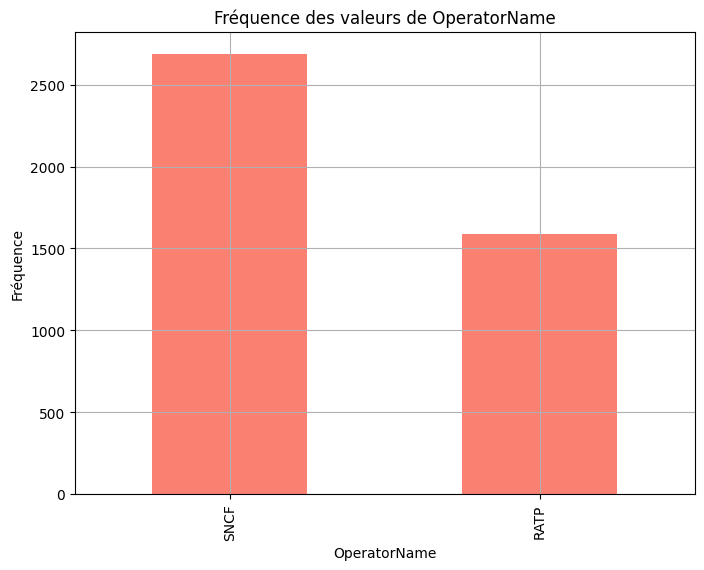

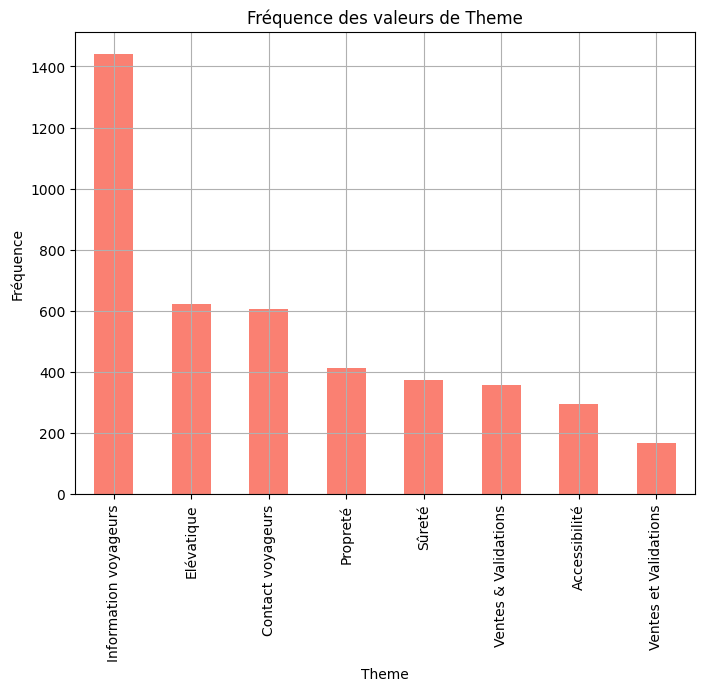

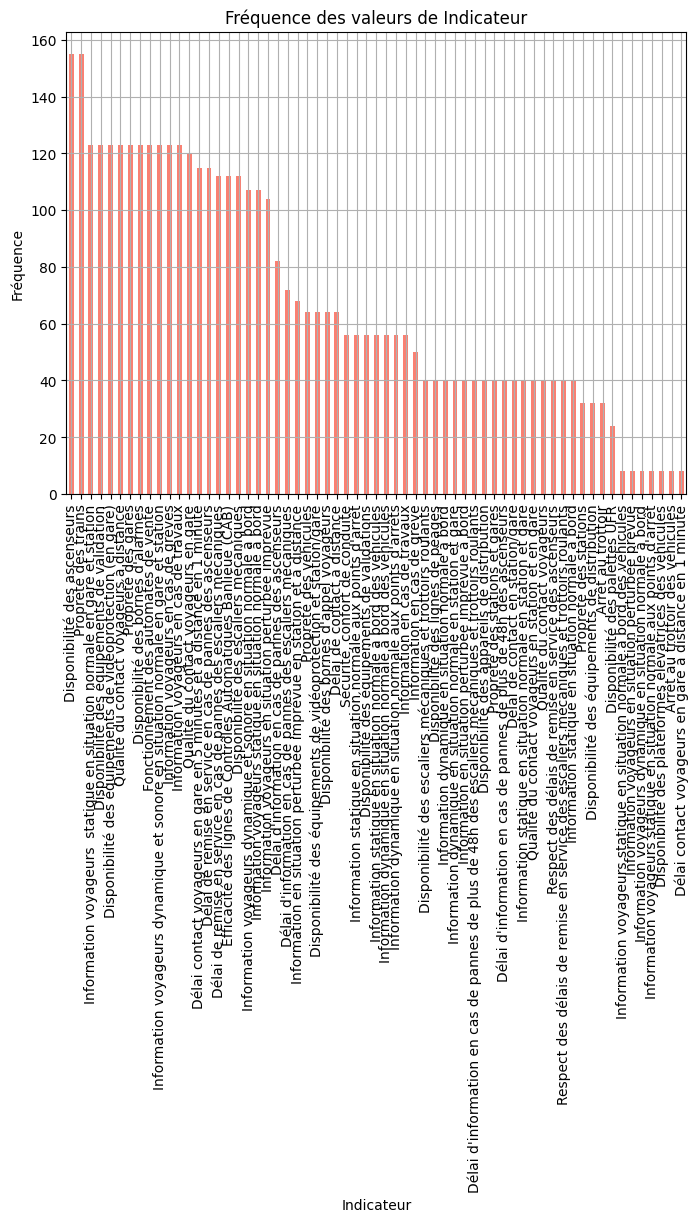

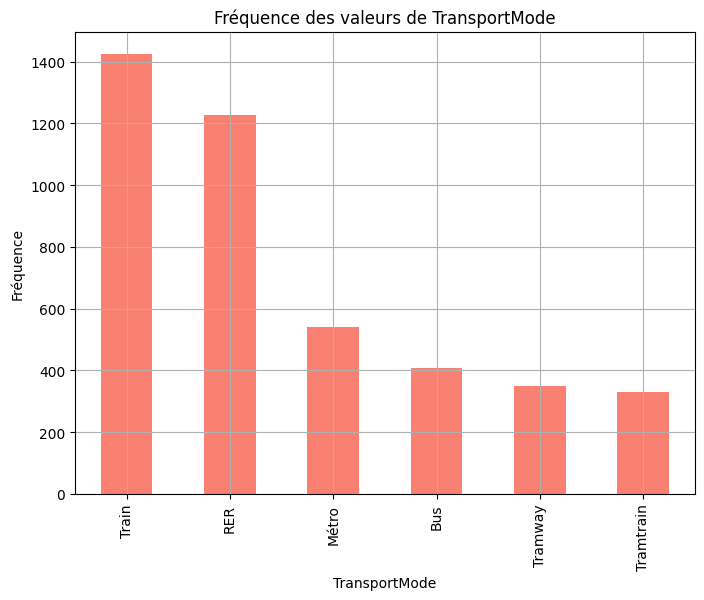

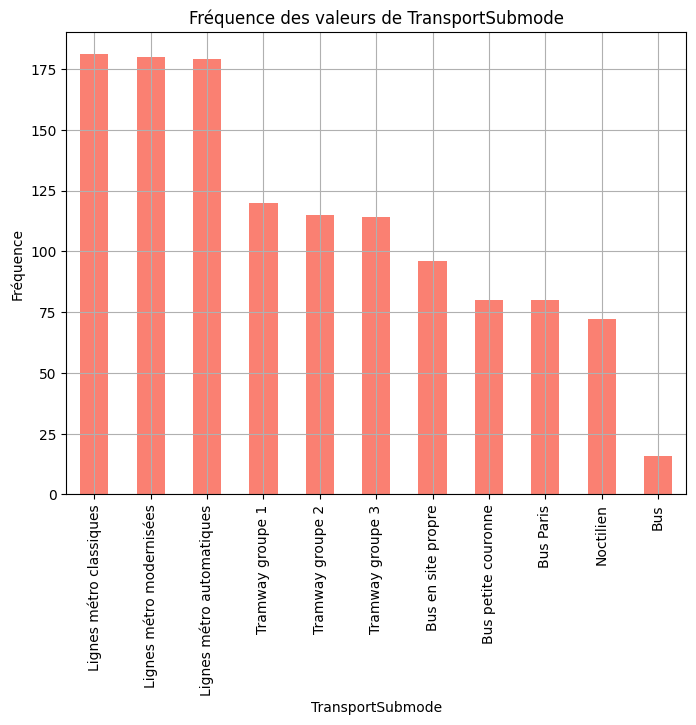

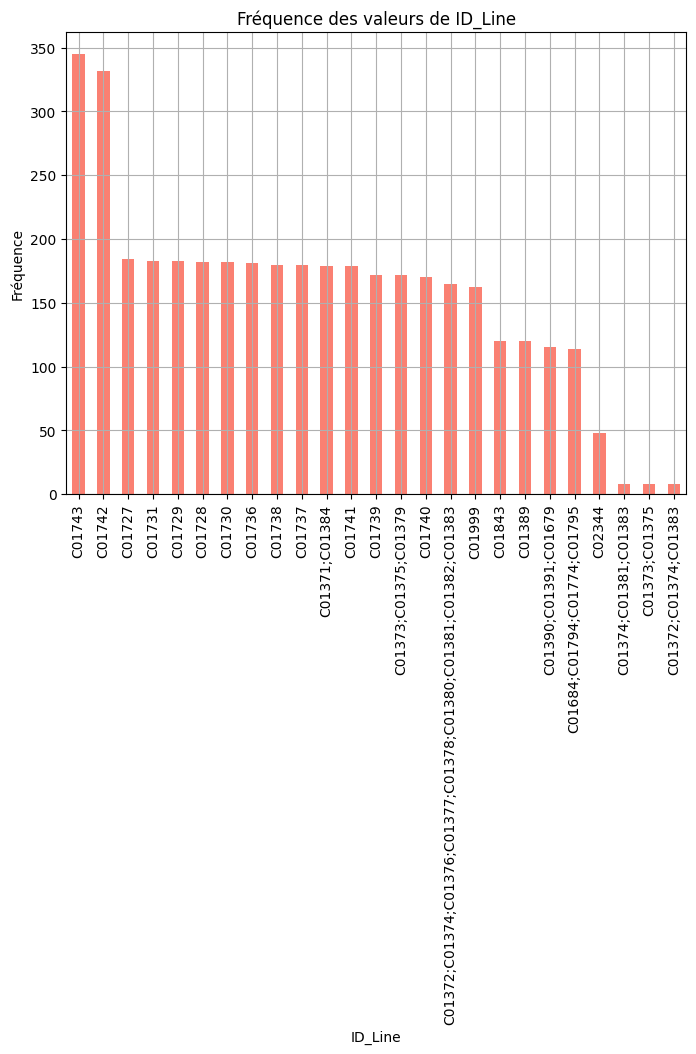

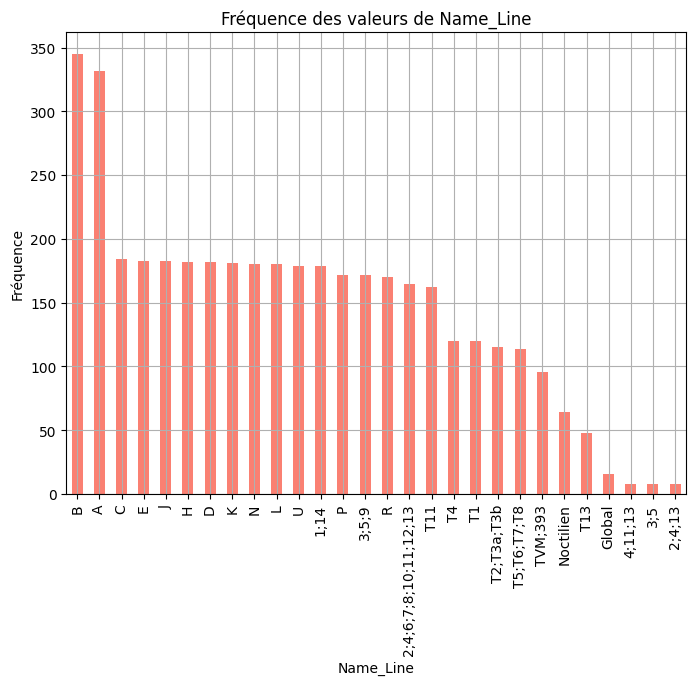

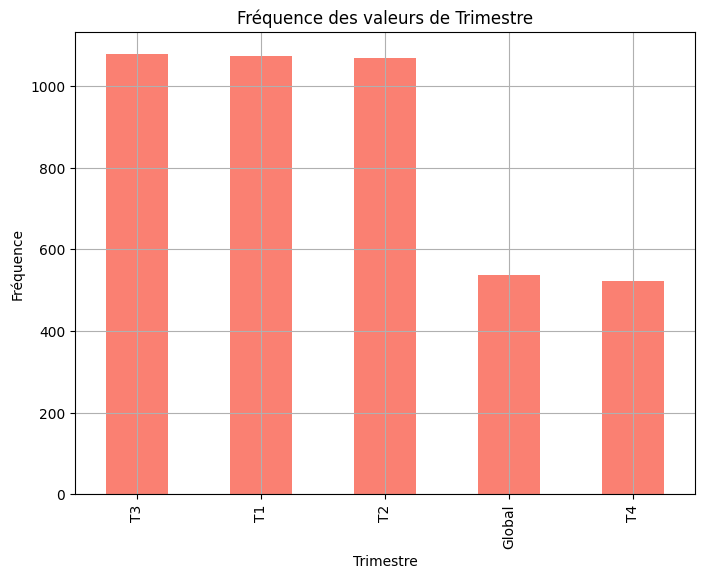

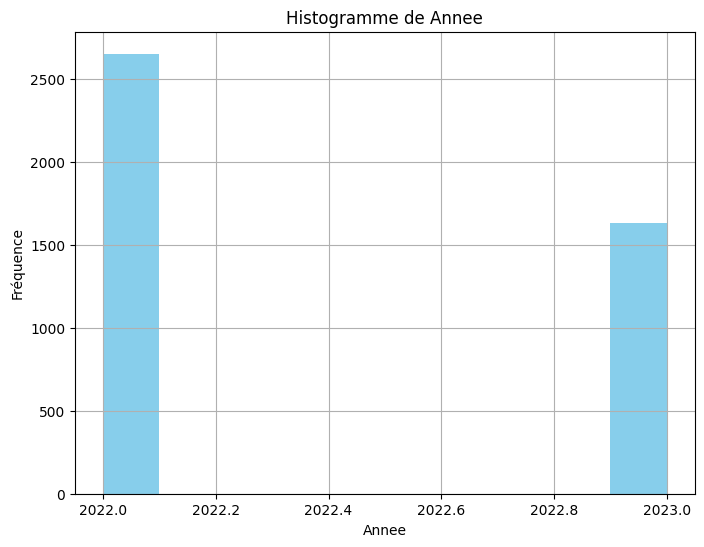

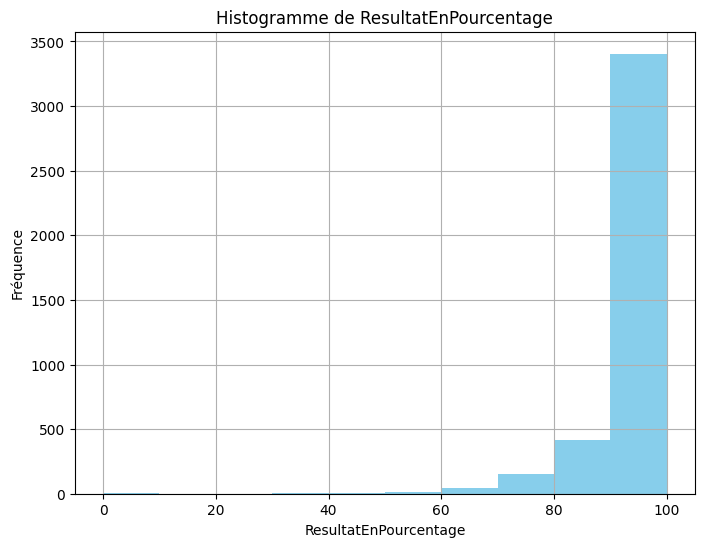

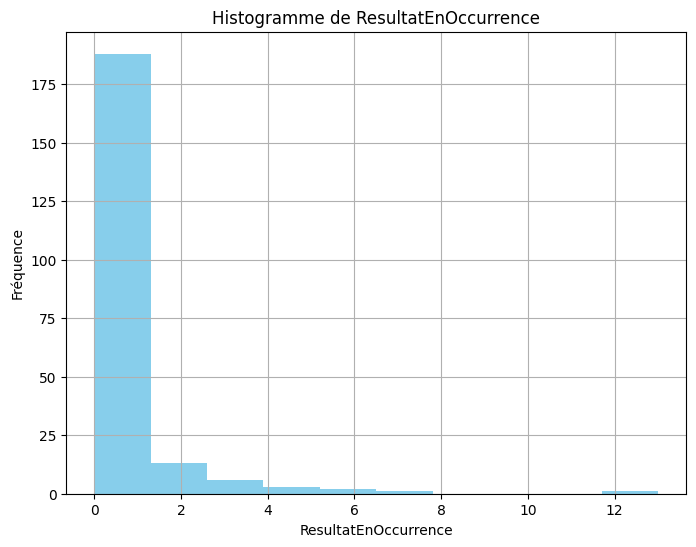

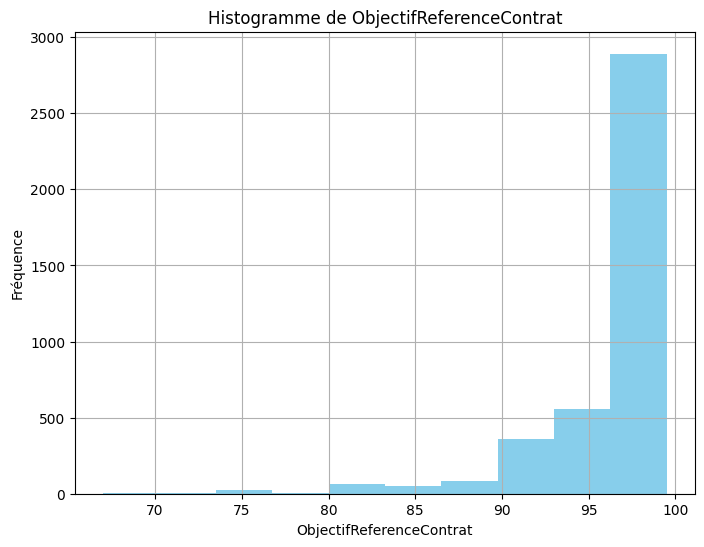

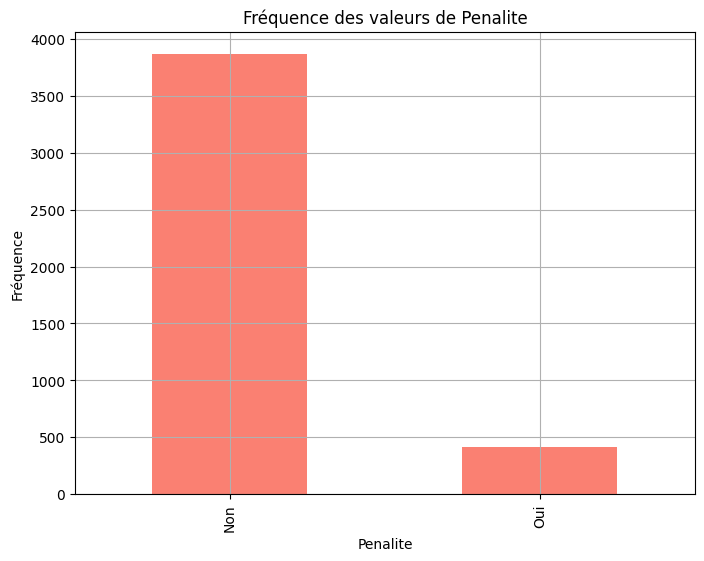

In [32]:
# Tracer chaque colonne
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=10, color='skyblue')
        plt.title(f'Histogramme de {column}')
        plt.xlabel(column)
        plt.ylabel('Fréquence')
        plt.grid(True)
        plt.show()
    elif df[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        df[column].value_counts().plot(kind='bar', color='salmon')
        plt.title(f'Fréquence des valeurs de {column}')
        plt.xlabel(column)
        plt.ylabel('Fréquence')
        plt.grid(True)
        plt.show()

# Chantier

In [46]:
import os
import pandas as pd

# Répertoire contenant les fichiers CSV
directory = './TempCSV/'

# Liste pour stocker les DataFrames des fichiers CSV correspondants
dfs = []

# Noms de fichiers recherchés
file_names = ['chantiers-a-paris-copie2019.csv','chantiers-a-paris-copie2020.csv', 'chantiers-a-paris-copie2021.csv', 'chantiers-a-paris-copie2022.csv']

# Parcourir tous les fichiers dans le répertoire
for filename in file_names:
    file_path = os.path.join(directory, filename)
    # Vérifier si le fichier existe
    if os.path.exists(file_path):
        # Lire le fichier CSV en DataFrame
        df = pd.read_csv(file_path, delimiter=';', quotechar='"', encoding='utf-8')
        # Ajouter le DataFrame à la liste
        dfs.append(df)
    else:
        print(f"Le fichier {filename} n'existe pas dans le répertoire.")

# Concaténer tous les DataFrames dans une seule DataFrame si nécessaire
if dfs:
    final_df = pd.concat(dfs, ignore_index=True)
    print("Fichiers CSV ouverts avec succès.")
    print(final_df.head())  # Afficher les premières lignes de la DataFrame finale
else:
    print("Aucun des fichiers recherchés n'a été trouvé dans le répertoire.")


Fichiers CSV ouverts avec succès.
  Référence Chantier Code postal arrondissement - Commune  \
0           EC143820                                75015   
1           EC143992                                75014   
2           EC144273                                75018   
3           EC144294                                75005   
4           EC144301                                75013   

  Date début du chantier Date fin du chantier  \
0             2019-11-13           2020-01-03   
1             2019-12-09           2019-12-13   
2             2019-11-18           2019-12-13   
3             2019-11-22           2019-11-26   
4             2019-12-31           2020-07-31   

                             Responsable du chantier  \
0                       Tiers (travaux sur bâtiment)   
1  Ville de Paris (Tvx sur espace ou édifice public)   
2  Ville de Paris (Tvx sur espace ou édifice public)   
3  Ville de Paris (Tvx sur espace ou édifice public)   
4                       

In [47]:
final_df.head()

,Référence Chantier,Code postal arrondissement - Commune,Date début du chantier,Date fin du chantier,Responsable du chantier,Maîtrise d'ouvrage principale,Surface (m2),Synthèse - Nature du chantier,Encombrement espace public,Impact stationnement,Identifiant demande CITE,Identifiant Chantier CITE,geo_shape,geo_point_2d
0,EC143820,75015,2019-11-13,2020-01-03,Tiers (travaux sur bâtiment),Propriétés - Co-propriétés publiques et privées,19.75,Construction ou réhabilitation d'immeuble,EMPRISE_TROTTOIR,NaN,125543,99357,"{""coordinates"": [[[2.289514563091533, 48.85021...","48.85021599828182, 2.2895848947158814"
1,EC143992,75014,2019-12-09,2019-12-13,Ville de Paris (Tvx sur espace ou édifice public),Direction de la Voirie et des Déplacements,96.69,Aménagement de voirie (VdP*),EMPRISE_CHAUSSEE,NaN,125689,99458,"{""coordinates"": [[[2.3120046738644255, 48.8277...","48.8276207712385, 2.311990837849748"
2,EC144273,75018,2019-11-18,2019-12-13,Ville de Paris (Tvx sur espace ou édifice public),Direction de la Voirie et des Déplacements,17.04,Aménagement de voirie (VdP*),"EMPRISE_CHAUSSEE,EMPRISE_TROTTOIR",NaN,125907,99644,"{""coordinates"": [[[2.342730902686306, 48.88608...","48.88610068434533, 2.3427867907218847"
3,EC144294,75005,2019-11-22,2019-11-26,Ville de Paris (Tvx sur espace ou édifice public),Direction des Espaces Verts et de l'Environnement,10.29,Végétalisation de l'espace public (VdP*),EMPRISE_TROTTOIR,NaN,125915,99652,"{""coordinates"": [[[2.3494552936639432, 48.8444...","48.84447619049311, 2.3494849210494553"
4,EC144301,75013,2019-12-31,2020-07-31,Tiers (travaux sur bâtiment),Propriétés - Co-propriétés publiques et privées,21.75,Construction ou réhabilitation d'immeuble,EMPRISE_CHAUSSEE,STATIONNEMENT_PAYANT,124949,98892,"{""coordinates"": [[[2.3595654304983866, 48.8361...","48.83615399231971, 2.3596043854744018"


,OperatorName,Theme,Indicateur,TransportMode,TransportSubmode,ID_Line,Name_Line,Trimestre,Annee,ResultatEnPourcentage,ResultatEnOccurrence,ObjectifReferenceContrat,Penalite
0,SNCF,Information voyageurs,Information voyageurs statique en situation n...,RER,NaN,C01742,A,T1,2022,96.8,NaN,98.0,Non
1,SNCF,Information voyageurs,Information voyageurs statique en situation n...,Train,NaN,C01730,H,T1,2022,97.0,NaN,98.0,Non
2,SNCF,Information voyageurs,Information voyageurs statique en situation n...,Train,NaN,C01736,K,T1,2022,100.0,NaN,98.0,Non
3,SNCF,Information voyageurs,Information voyageurs statique en situation n...,Train,NaN,C01736,K,T2,2022,100.0,NaN,98.0,Non
4,SNCF,Information voyageurs,Information voyageurs statique en situation n...,Train,NaN,C01739,P,T2,2022,94.3,NaN,98.0,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,RATP,Propreté,Propreté des stations,Tramway,Tramway groupe 1,C01389,T1,T2,2023,97.2,NaN,96.4,Non
4276,RATP,Propreté,Propreté des stations,Tramway,Tramway groupe 2,C01390;C01391;C01679,T2;T3a;T3b,T2,2023,87.6,NaN,96.5,Non
4277,RATP,Propreté,Propreté des stations,Tramway,Tramway groupe 2,C01390;C01391;C01679,T2;T3a;T3b,T3,2023,95.0,NaN,96.5,Non
4278,RATP,Propreté,Propreté des véhicules,Tramway,Tramway groupe 3,C01684;C01794;C01774;C01795,T5;T6;T7;T8,T4,2022,100.0,NaN,99.5,Non


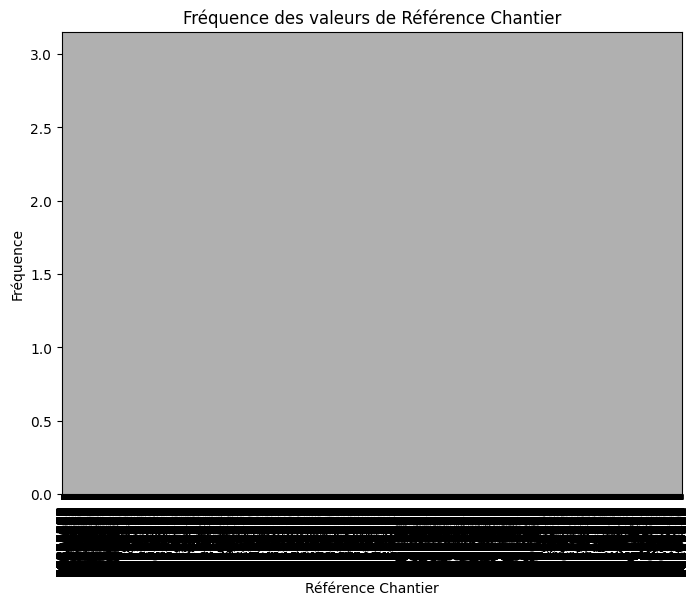

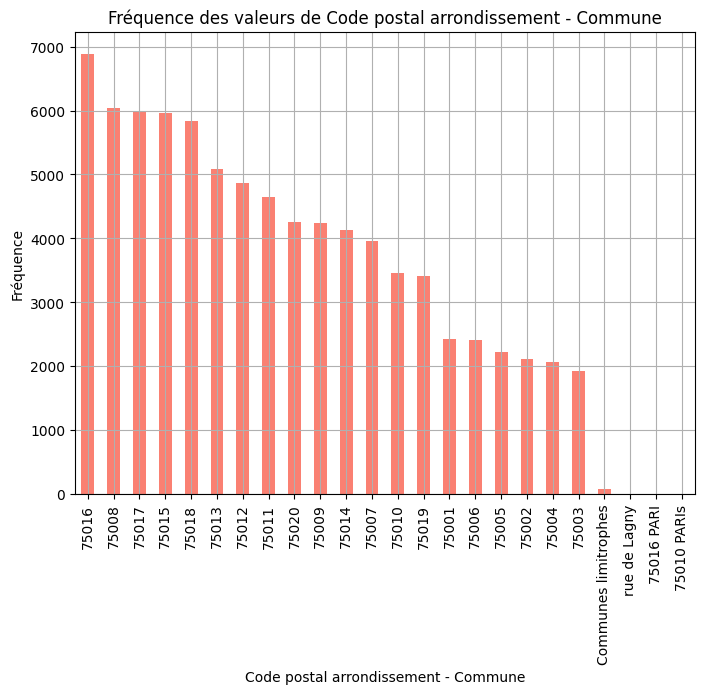

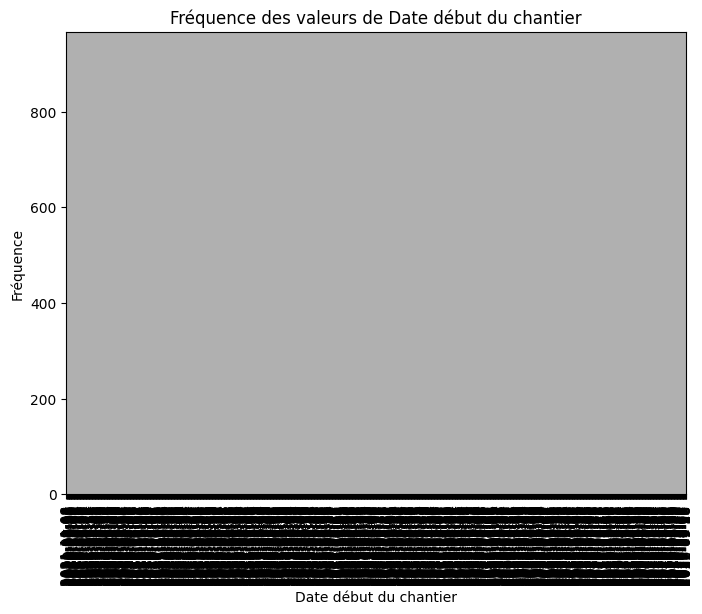

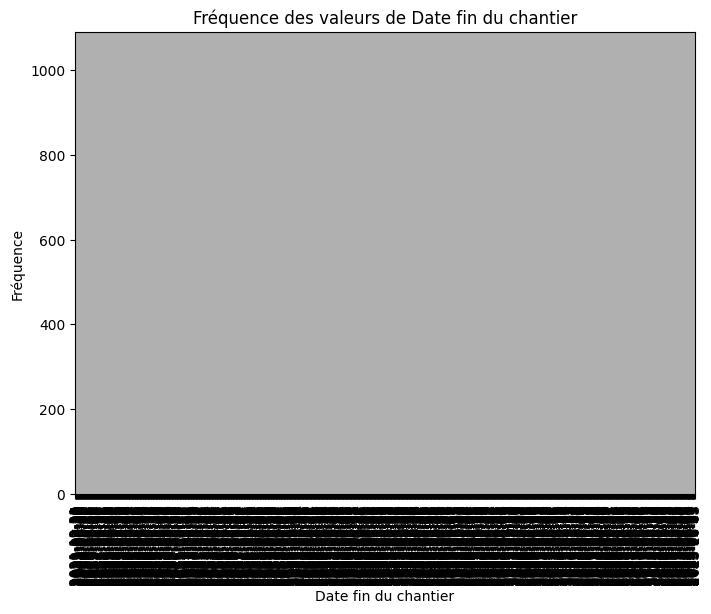

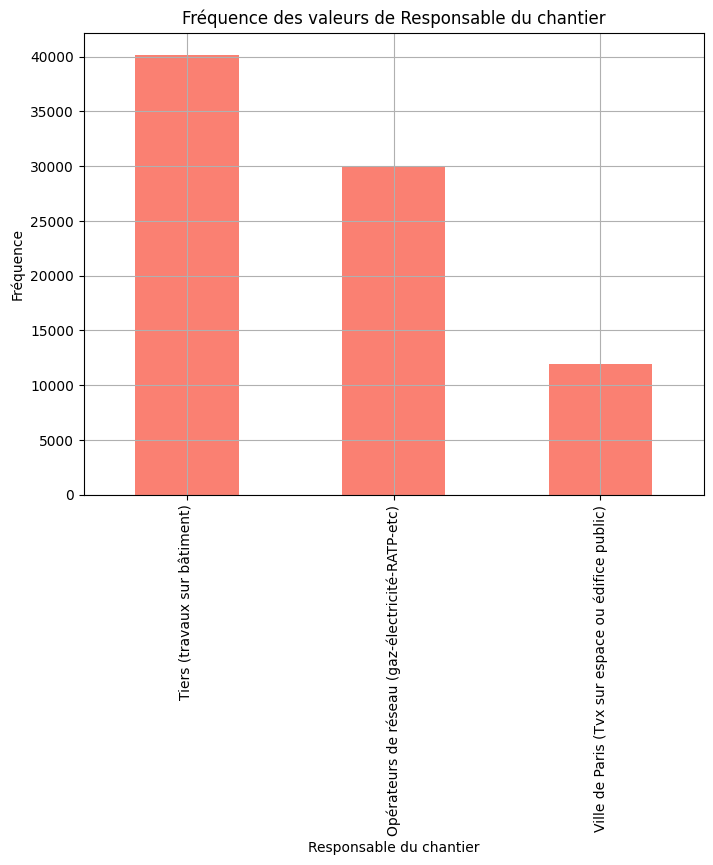

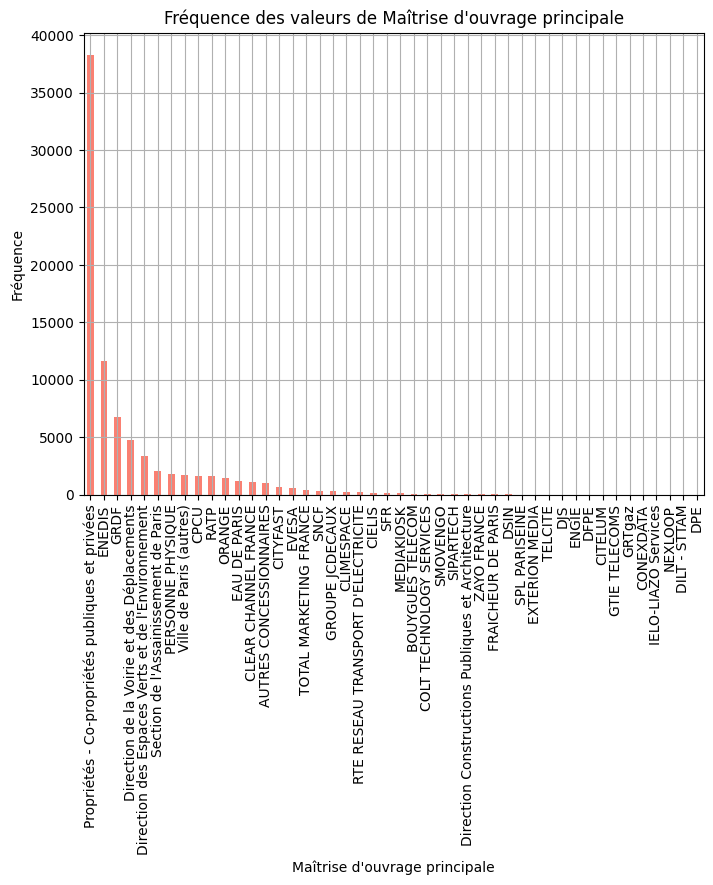

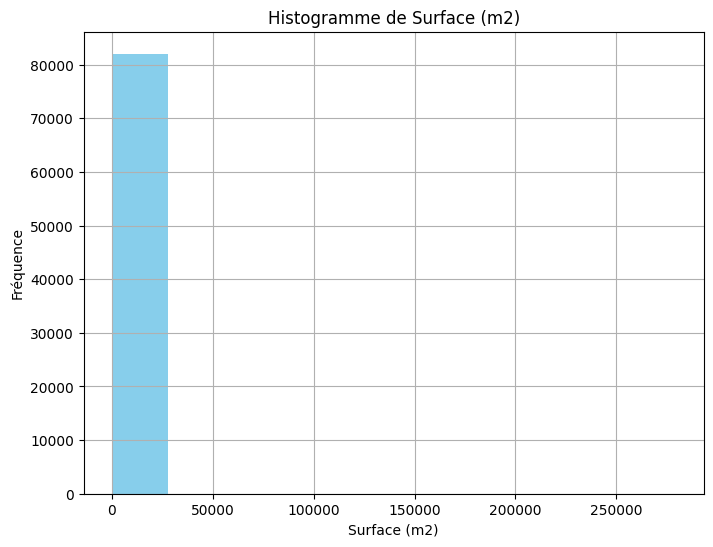

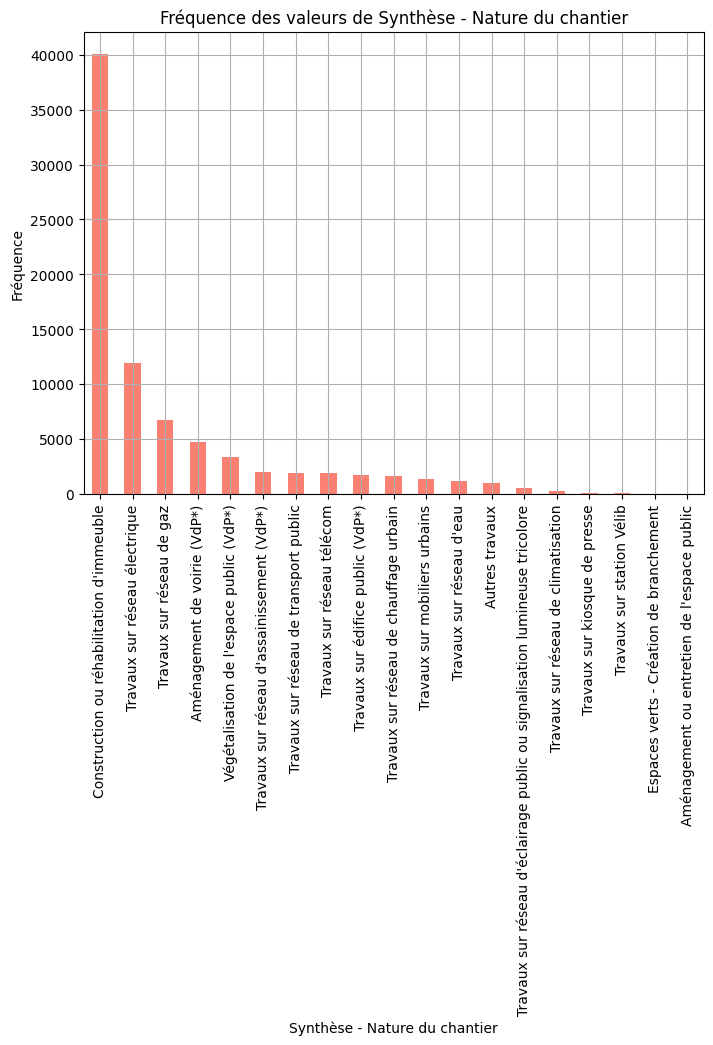

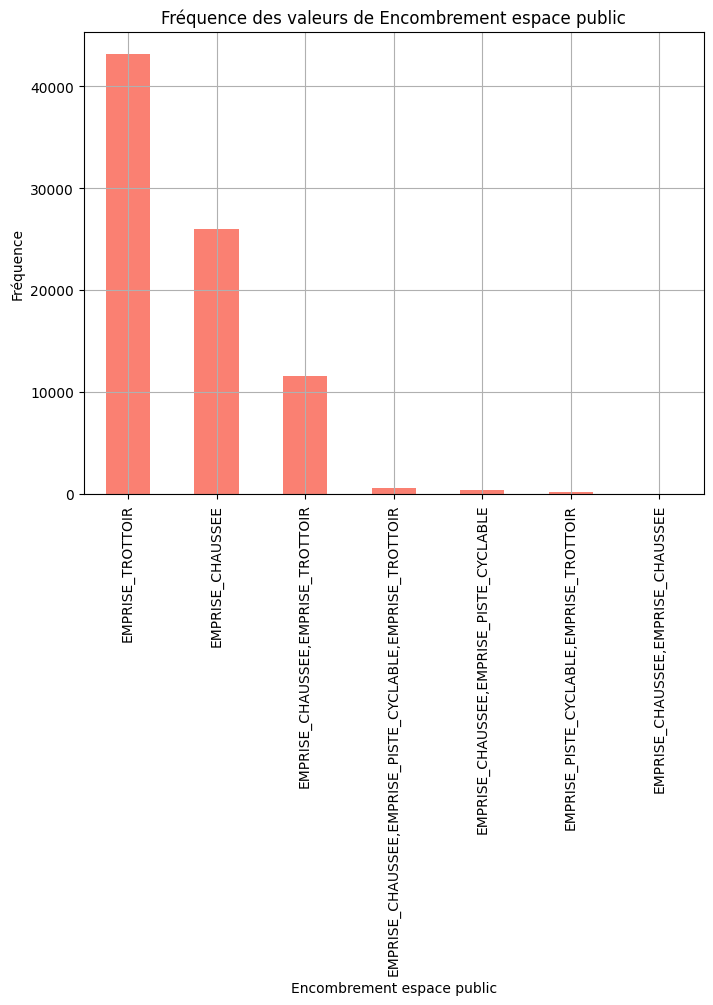

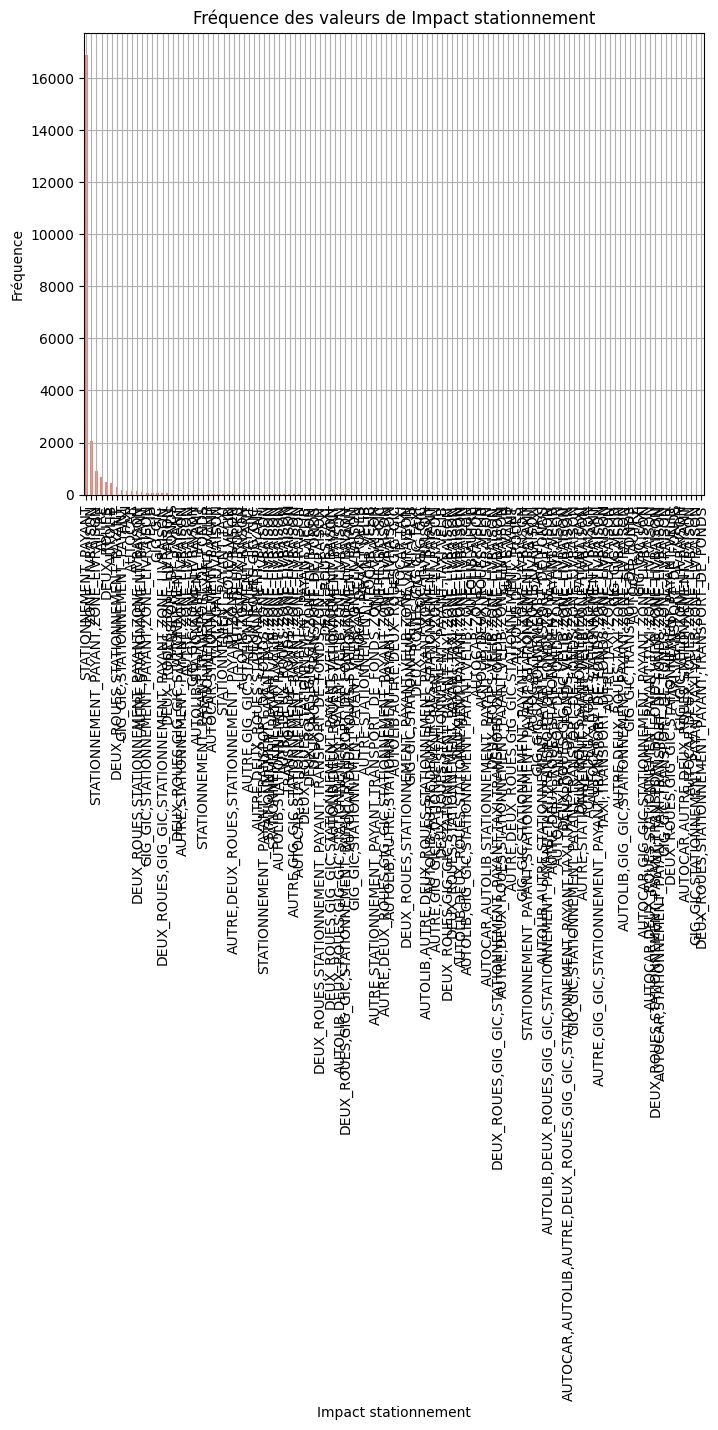

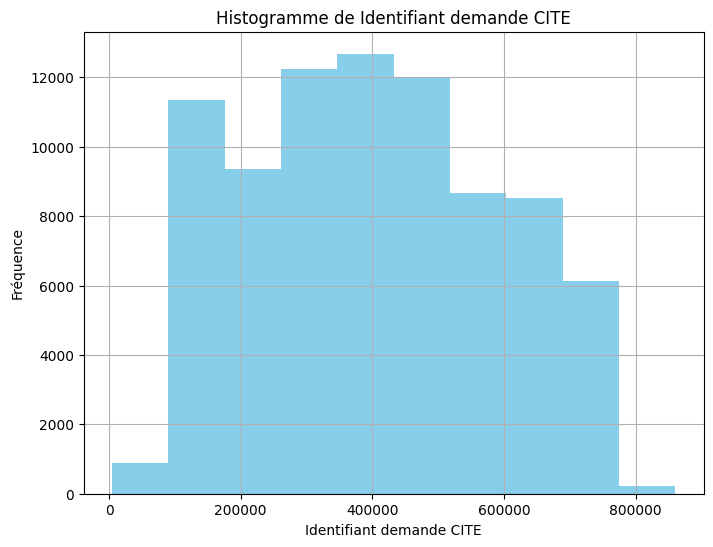

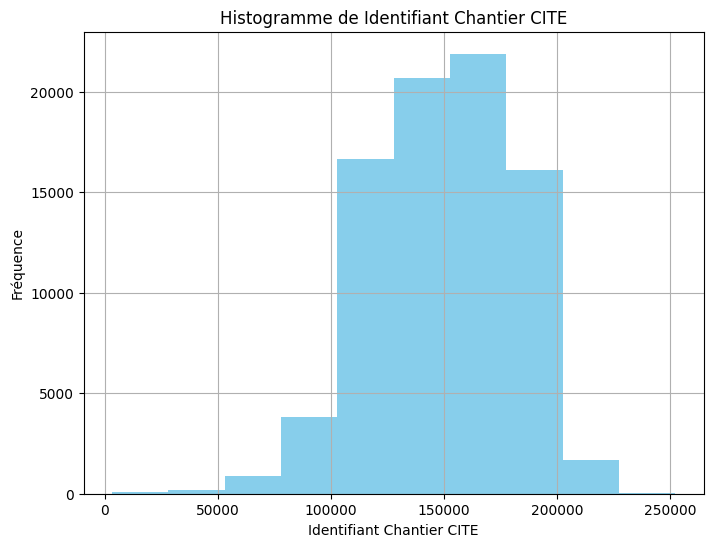

KeyboardInterrupt: 

In [41]:
# Tracer chaque colonne
for column in final_df.columns:
    if final_df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        plt.hist(final_df[column], bins=10, color='skyblue')
        plt.title(f'Histogramme de {column}')
        plt.xlabel(column)
        plt.ylabel('Fréquence')
        plt.grid(True)
        plt.show()
    elif final_df[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        final_df[column].value_counts().plot(kind='bar', color='salmon')
        plt.title(f'Fréquence des valeurs de {column}')
        plt.xlabel(column)
        plt.ylabel('Fréquence')
        plt.grid(True)
        plt.show()

In [44]:
final_df.head()

,Référence Chantier,Code postal arrondissement - Commune,Date début du chantier,Date fin du chantier,Responsable du chantier,Maîtrise d'ouvrage principale,Surface (m2),Synthèse - Nature du chantier,Encombrement espace public,Impact stationnement,Identifiant demande CITE,Identifiant Chantier CITE,geo_shape,geo_point_2d
0,EC150904,75019,2020-11-23,2020-12-18,Opérateurs de réseau (gaz-électricité-RATP-etc),ORANGE,10.22,Travaux sur réseau télécom,"EMPRISE_CHAUSSEE,EMPRISE_TROTTOIR",NaN,131959,104691,"{""coordinates"": [[[2.402503891405406, 48.87626...","48.876281016331305, 2.4024786260530306"
1,EC150963,75016,2020-01-27,2020-05-29,Opérateurs de réseau (gaz-électricité-RATP-etc),ENEDIS,2.47,Travaux sur réseau électrique,EMPRISE_TROTTOIR,NaN,131997,104729,"{""coordinates"": [[[2.283812214385079, 48.86731...","48.867301530208245, 2.2838119351539805"
2,EC150978,75019,2020-06-05,2020-07-20,Tiers (travaux sur bâtiment),Propriétés - Co-propriétés publiques et privées,13.91,Construction ou réhabilitation d'immeuble,EMPRISE_CHAUSSEE,NaN,132008,104737,"{""coordinates"": [[[2.4044294699206943, 48.8774...","48.87748292478862, 2.404467812734711"
3,EC151143,75013,2020-01-20,2020-02-28,Ville de Paris (Tvx sur espace ou édifice public),Direction des Espaces Verts et de l'Environnement,177.14,Végétalisation de l'espace public (VdP*),"EMPRISE_CHAUSSEE,EMPRISE_TROTTOIR",NaN,132114,104816,"{""coordinates"": [[[2.3645434774211633, 48.8267...","48.82673454659, 2.3647674066710995"
4,EC151183,75008,2020-02-24,2020-07-30,Tiers (travaux sur bâtiment),Propriétés - Co-propriétés publiques et privées,10.18,Construction ou réhabilitation d'immeuble,EMPRISE_CHAUSSEE,STATIONNEMENT_PAYANT,132127,104829,"{""coordinates"": [[[2.321603801725048, 48.87573...","48.87574061670875, 2.321637446316429"


In [48]:
# Nom du fichier CSV de sortie
output_file = 'chantier2019-2022.csv'

# Sauvegarder le DataFrame en tant que fichier CSV
final_df.to_csv(output_file, index=False)

print(f"Le fichier CSV '{output_file}' a été créé avec succès.")


Le fichier CSV 'chantier2019-2022.csv' a été créé avec succès.


# HISTORIQUE POPULATION

In [50]:
df_pop = pd.read_csv('./CSV_Cool/historique-des-populations-legales.csv', delimiter=';')
df_pop.head()

,Code INSEE,Commune,Population municipale,Année
0,91105,Breuillet,8419,2014
1,91121,Buno-Bonnevaux,471,2014
2,91122,Bures-sur-Yvette,9708,2014
3,91175,Corbreuse,1768,2014
4,91330,Lardy,5524,2014


In [53]:
df_pop.tail()

,Code INSEE,Commune,Population municipale,Année
18207,95427,MONTMAGNY,6584,1968
18208,95436,MOURS,299,1968
18209,95450,NEUVILLE SUR OISE,905,1968
18210,95509,PUISEUX EN FRANCE,1020,1968
18211,95607,TAVERNY,12902,1968


In [54]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18212 entries, 0 to 18211
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Code INSEE             18212 non-null  int64 
 1   Commune                18212 non-null  object
 2   Population municipale  18212 non-null  int64 
 3   Année                  18212 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 569.2+ KB


In [55]:
# Sélectionner les lignes correspondant à MONTMAGNY (Code INSEE 95427)
montmagny_df = df_pop.loc[(df_pop['Code INSEE'] == 95427) & (df_pop['Commune'] == 'MONTMAGNY')]

# Imprimer toutes les valeurs de l'année
annees_montmagny = montmagny_df['Année'].unique()
print("Toutes les valeurs d'années pour MONTMAGNY :")
print(annees_montmagny)


Toutes les valeurs d'années pour MONTMAGNY :
[2007 2006 1999 1975 1982 1990 1968]


#### manque de continuité dans les populations

# Indicateur qualite service


In [59]:
df_pop = pd.read_csv('./CSV_Cool/les-equipements-dans-le-domaine-du-tourisme-et-du-transport-base-permanente-des-.csv', delimiter=';')
df_pop.head()

,Département,Département commune,Libellé de commune,Arrondissement,Canton ville,Zone d'emploi,Unité urbaine,Population 2010,Taxi,Aéroport,...,Gare sous convention avec l’État,Gare sous convention avec les conseils régionaux ou les STIF,Agence de voyage,Hôtel homologué,Hôtel homologué - nombre de chambres,Camping homologué,Camping homologué - nombre d'emplacements,Information Touristique,geo_point_2d,geo_shape
0,77,77214,['Gressy'],771,7737,56,77000,912,4,0,...,0,0,0,1,86,0,0,0,"48.96500997292701, 2.664403767243342","{""coordinates"": [[[2.653194165163208, 48.95561..."
1,94,94054,['Orly'],941,9420,1118,851,21395,34,1,...,0,2,6,4,621,0,0,2,"48.74293200731665, 2.394682969987736","{""coordinates"": [[[2.370437363052879, 48.72786..."
2,95,95212,['Épiais-lès-Louvres'],952,9513,56,851,88,0,0,...,0,0,0,1,15,0,0,0,"49.03019328702893, 2.548840908547871","{""coordinates"": [[[2.56933989297066, 49.039594..."
3,78,78062,['Beynes'],782,7815,1113,78205,7678,9,0,...,0,1,0,0,0,0,0,1,"48.85444441397697, 1.8698901751290151","{""coordinates"": [[[1.874862143377979, 48.83437..."
4,78,78442,['Neauphle-le-Château'],782,7815,1113,851,3011,5,0,...,0,0,0,1,22,0,0,0,"48.813099742087246, 1.9047041271768572","{""coordinates"": [[[1.914910943479307, 48.80263..."


In [60]:
df_pop.info

<bound method DataFrame.info of       Département  Département commune       Libellé de commune  \
0              77                77214               ['Gressy']   
1              94                94054                 ['Orly']   
2              95                95212   ['Épiais-lès-Louvres']   
3              78                78062               ['Beynes']   
4              78                78442  ['Neauphle-le-Château']   
...           ...                  ...                      ...   
1295           94                94069        ['Saint-Maurice']   
1296           94                94070              ['Santeny']   
1297           95                95214  ['Épinay-Champlâtreux']   
1298           95                95369             ['Margency']   
1299           95                95572  ["Saint-Ouen-l'Aumône"]   

      Arrondissement  Canton ville  Zone d'emploi  Unité urbaine  \
0                771          7737             56          77000   
1                941       

### non date des données, incapable de situer dans le temps

# Positionnement dans la rame

In [62]:
df_rame = pd.read_csv('./CSV_Cool/positionnement-dans-la-rame.csv', delimiter=';')
df_rame.head()

,from_type,from_id,from_name,line_id,line_name,to_type,to_id,to_name,position_average,position,position_max,equipment_type
0,stop_point,21902,République,C01373,3,access_point,50148720,bd Saint-Martin,Arrière,5,5,NaN
1,stop_point,21902,République,C01373,3,stop_point,22199,République,Arrière,5,5,NaN
2,stop_point,21903,République,C01375,5,access_point,50148407,pl. de la République,Avant,1,5,NaN
3,stop_point,21903,République,C01375,5,access_point,50148720,bd Saint-Martin,Avant,1,5,NaN
4,stop_point,21903,République,C01375,5,access_point,50148722,bd Voltaire,Milieu,3,5,NaN


In [63]:
df_rame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3298 entries, 0 to 3297
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   from_type         3298 non-null   object
 1   from_id           3298 non-null   int64 
 2   from_name         3298 non-null   object
 3   line_id           3298 non-null   object
 4   line_name         3298 non-null   object
 5   to_type           3298 non-null   object
 6   to_id             3298 non-null   int64 
 7   to_name           3298 non-null   object
 8   position_average  3298 non-null   object
 9   position          3298 non-null   int64 
 10  position_max      3298 non-null   int64 
 11  equipment_type    195 non-null    object
dtypes: int64(4), object(8)
memory usage: 309.3+ KB


In [64]:
df_rame['line_name'].unique()

array(['3', '5', '9', '11', '3B', '14', '12', '10', '6', '1', '4', '2',
       '8', '13', '7', '7B', 'T3B', 'T3A'], dtype=object)

# Trafic combi

In [66]:
df_combi = pd.read_csv('./CSV_Cool/trafic_combiné.csv', delimiter=';')
df_combi.head()

,Rang,Réseau,Station,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris
0,11,Métro,HOTEL DE VILLE,12307363,1,11,NaN,NaN,NaN,Paris,4.0
1,17,Métro,ESPLANADE DE LA DEFENSE,9883008,1,NaN,NaN,NaN,NaN,Puteaux,NaN
2,19,Métro,FRANKLIN D. ROOSEVELT,9545487,1,9,NaN,NaN,NaN,Paris,8.0
3,22,Métro,NATION,8834660,1,2,6,9.0,NaN,Paris,12.0
4,28,Métro,PLACE CLICHY,8020440,2,13,NaN,NaN,NaN,Paris,17.0


In [69]:
# Sélectionner les lignes où la station est "HOTEL DE VILLE"
hotel_de_ville_rows = df_combi[df_combi['Station'] == 'HOTEL DE VILLE']

# Afficher les lignes sélectionnées
hotel_de_ville_rows

,Rang,Réseau,Station,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris
0,11,Métro,HOTEL DE VILLE,12307363,1,11,NaN,NaN,NaN,Paris,4.0
397,13,Métro,HOTEL DE VILLE,5673100,1,11,NaN,NaN,NaN,Paris,4.0
842,13,Métro,HOTEL DE VILLE,7251729,1,11,NaN,NaN,NaN,Paris,4.0


In [70]:
df_combi.info

<bound method DataFrame.info of       Rang Réseau                  Station    Trafic Correspondance_1  \
0       11  Métro           HOTEL DE VILLE  12307363                1   
1       17  Métro  ESPLANADE DE LA DEFENSE   9883008                1   
2       19  Métro    FRANKLIN D. ROOSEVELT   9545487                1   
3       22  Métro                   NATION   8834660                1   
4       28  Métro             PLACE CLICHY   8020440                2   
...    ...    ...                      ...       ...              ...   
1106    39    RER       FONTENAY-SOUS-BOIS   2121720                A   
1107    40    RER            SUCY-BONNEUIL   1993503                A   
1108    58    RER               LE GUICHET    530706                B   
1109    65    RER           PARC DE SCEAUX    383626                B   
1110    66    RER           LA HACQUINIERE    285626                B   

     Correspondance_2 Correspondance_3  Correspondance_4  Correspondance_5  \
0            

In [71]:
df_combi['Station'].unique()

array(['HOTEL DE VILLE', 'ESPLANADE DE LA DEFENSE',
       'FRANKLIN D. ROOSEVELT', 'NATION', 'PLACE CLICHY', 'CHATEAU ROUGE',
       'BIBLIOTHEQUE', 'AUBERVILLIERS-PANTIN-QUATRE CHEMINS', 'CHATELET',
       'BIR-HAKEIM', 'OPERA', 'MAIRIE DE MONTROUGE', 'PALAIS-ROYAL',
       'COUR SAINT-EMILION', 'STRASBOURG-SAINT-DENIS', 'VILLIERS',
       'PORTE DE CLIGNANCOURT', 'SEVRES-BABYLONE', 'HAVRE-CAUMARTIN',
       'RICHELIEU-DROUOT', 'CHARLES DE GAULLE-ETOILE', 'PLAISANCE',
       'STALINGRAD', 'SAINT-DENIS-UNIVERSITE', 'LA CHAPELLE',
       'CRETEIL-PREFECTURE', 'LES SABLONS', 'BONNE NOUVELLE',
       'SAINT-MICHEL', 'GLACIERE', "PORTE D'ORLEANS", 'PORTE DE CLICHY',
       'SAINT-MANDE-TOURELLE', 'PEREIRE', 'PYRAMIDES', 'LA MUETTE',
       'GARE DU NORD', 'MARCADET-POISSONNIERS', 'MENILMONTANT',
       'SAINT-LAZARE', 'MIROMESNIL', "FORT D'AUBERVILLIERS",
       'GARE DE LYON', 'JAURES', 'SAINT-GERMAIN DES PRES', 'LA DEFENSE',
       'PIGALLE', 'EGLISE DE PANTIN', 'BELLEVILLE', 'MARCEL SE

# Travaux SNCF RATP

In [72]:
df_TSR = pd.read_csv('./CSV_Cool/TravauxSNCF_RATP_2019-2022.csv', delimiter=';')
df_TSR.head()

,Référence Chantier,Code postal arrondissement - Commune,Date début du chantier,Date fin du chantier,Responsable du chantier,Maîtrise d'ouvrage principale,Surface (m2),Synthèse - Nature du chantier,Encombrement espace public,Impact stationnement,Identifiant demande CITE,Identifiant Chantier CITE,geo_shape,geo_point_2d
0,EC149360,75004,2019-12-16,2019-12-20,Opérateurs de réseau (gaz-électricité-RATP-etc),RATP,9.13,Travaux sur réseau de transport public,EMPRISE_TROTTOIR,NaN,130520,103482,"{""coordinates"": [[[2.3584960379852222, 48.8543...","48.85431161383518, 2.358496563308432"
1,EC143169,75015,2019-11-25,2019-12-13,Opérateurs de réseau (gaz-électricité-RATP-etc),RATP,224.69,Travaux sur réseau de transport public,"EMPRISE_CHAUSSEE,EMPRISE_TROTTOIR",NaN,124986,98918,"{""coordinates"": [[[2.298130063341984, 48.84908...","48.84904331680768, 2.2979730027487317"
2,EC146035,75017,2019-11-28,2019-12-06,Opérateurs de réseau (gaz-électricité-RATP-etc),SNCF,383.32,Travaux sur réseau de transport public,EMPRISE_CHAUSSEE,NaN,127442,100873,"{""coordinates"": [[[2.294098752608522, 48.87490...","48.875105790329215, 2.2938792856422676"
3,EC101353,75001,2019-03-08,2019-06-28,Opérateurs de réseau (gaz-électricité-RATP-etc),RATP,103.44,Travaux sur réseau de transport public,EMPRISE_TROTTOIR,NaN,87566,67973,"{""coordinates"": [[[[2.342282086238916, 48.8586...","48.85869275120488, 2.3421547092435926"
4,EC6520,75012,2016-01-01,2022-01-25,Opérateurs de réseau (gaz-électricité-RATP-etc),RATP,1760.89,Travaux sur réseau de transport public,EMPRISE_CHAUSSEE,NaN,4037,3079,"{""coordinates"": [[[2.396792756027481, 48.84758...","48.847861582585196, 2.3968969115602876"


# Validation reseau ferre 1er semestre 

In [73]:
df_vj = pd.read_csv('./CSV_Cool/validations-reseau-ferre-nombre-validations-par-jour-1er-semestre.csv', delimiter=';')
df_vj.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CATEGORIE_TITRE,NB_VALD
0,2023-03-08,100,110,44,AVRON,71686,AMETHYSTE,234
1,2023-03-08,100,110,44,AVRON,71686,NON DEFINI,178
2,2023-03-08,100,110,44,AVRON,71686,TST,302
3,2023-03-08,100,110,441,LEDRU-ROLLIN,71693,?,74
4,2023-03-08,100,110,441,LEDRU-ROLLIN,71693,NON DEFINI,121


In [74]:
df_vj = pd.read_csv('./CSV_Cool/validations-reseau-ferre-profils-horaires-par-jour-type-1er-semestre.csv', delimiter=';')
df_vj.head()

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100,110,300,GALLIENI,71817,JOVS,20H-21H,3.50
1,100,110,300,GALLIENI,71817,JOVS,22H-23H,1.32
2,100,110,300,GALLIENI,71817,JOVS,3H-4H,0.00
3,100,110,300,GALLIENI,71817,JOVS,6H-7H,4.17
4,100,110,300,GALLIENI,71817,SAHV,18H-19H,7.43


# Acces gare

In [75]:
df_acc = pd.read_csv('./CSVàVerif/accessibilite-en-gare.csv', delimiter=';')
df_acc.head()

,stop_point_id,accessibility_level_id,accessibility_level_name,commentaire,stop_name,stop_point_geopoint
0,stop_point:IDFM:monomodalStopPlace:43066,4,train accessible sur demande auprès d'un agent...,NaN,Antony,"48.754632057173126, 2.300890371505836"
1,stop_point:IDFM:monomodalStopPlace:45873,4,train accessible sur demande auprès d'un agent...,NaN,Auber,"48.872348840718196, 2.3296591495793595"
2,stop_point:IDFM:monomodalStopPlace:44493,4,train accessible sur demande auprès d'un agent...,NaN,Bagneux,"48.79333690627149, 2.3220087047421583"
3,stop_point:IDFM:monomodalStopPlace:411332,1,gare ou arrêt non accessible,NaN,Boran-sur-Oise,"49.16664871633883, 2.362237794019318"
4,stop_point:IDFM:monomodalStopPlace:47517,6,véhicule accessible en toute autonomie,NaN,Bouffémont - Moisselles,"49.045103567466136, 2.3229000286671555"


# Arret CSV

In [76]:
df_arr = pd.read_csv('./CSVàVerif/arrets.csv', delimiter=';')
df_arr.head()

,ArRId,ArRVersion,ArRCreated,ArRChanged,ArRName,ArRType,ArRPublicCode,ArRXEpsg2154,ArRYEpsg2154,ZdAId,ArRGeopoint,ArRTown,ArRPostalRegion,ArRAccessibility,ArRAudibleSignals,ArRVisualSigns,ArRFareZone
0,14970,1250460-1533057,2014-12-29T00:00:00+01:00,2023-01-09T09:47:08+01:00,Pasteur,bus,-,671805,6843819,42499,"48.693904034797036, 2.61692901241064",Brie-Comte-Robert,77053,partial,unknown,unknown,5
1,14986,1238023-1238017,2014-12-29T00:00:00+01:00,2023-01-09T09:47:08+01:00,Réveillon Écoles,bus,-,670426,6848172,44638,"48.73299424266356, 2.597892392259737",Lésigny,77249,unknown,unknown,unknown,5
2,14987,1238019-1238017,2014-12-29T00:00:00+01:00,2023-01-09T09:47:08+01:00,Réveillon Écoles,bus,-,670418,6848213,44638,"48.73336263308142, 2.5977807812829954",Lésigny,77249,unknown,unknown,unknown,5
3,14954,886152-886163,2014-12-29T00:00:00+01:00,2023-01-09T09:47:08+01:00,Les Myosotis,bus,-,671673,6843457,426937,"48.690646829044304, 2.6151723319505265",Brie-Comte-Robert,77053,partial,unknown,unknown,5
4,14968,1440816-1440818,2014-12-29T15:31:51+01:00,2023-01-09T09:47:08+01:00,Parc Centre Commercial,bus,-,670959,6848670,55149,"48.737497476060646, 2.6051054273842142",Lésigny,77249,unknown,unknown,unknown,5


# Emploi communes

In [78]:
df_emp = pd.read_csv('./CSVàVerif/emploi-exhaustif-des-communes-dile-de-france-donnee-insee.csv', delimiter=';')
df_emp.head()

,Geo Point,Geo Shape,insee,emp2006,emp2007,emp2008,emp2009,emp2010,emp2011,emp2012,...,emp2014,emp2015,objectid_1,objectid,emp1999,emp1990,emp1982,emp1975,emp2016,emp2017
0,"48.287860181, 2.5305488168","{""coordinates"": [[2.530548816798451, 48.287860...",77003,60.837701,62.753654,64.756519,62.683908,60.481932,59.39,61.49,...,65.370323,60.339619,23,23,60,70,80,75,62.840643,60.082783
1,"48.6143359877, 2.80672187701","{""coordinates"": [[2.806721877012404, 48.614335...",77004,33.821728,34.041220,34.134639,36.341439,37.117505,37.72,37.31,...,37.608431,37.600353,24,24,52,70,44,55,41.140339,41.144243
2,"48.922738238, 2.70848232012","{""coordinates"": [[2.708482320116412, 48.922738...",77005,423.480199,413.594294,414.111840,420.118966,407.197242,401.69,428.57,...,492.531092,514.800320,25,25,331,332,348,350,507.894469,534.939295
3,"48.6199688824, 2.90344510404","{""coordinates"": [[2.903445104040421, 48.619968...",77010,122.684809,134.120213,127.532726,132.072416,135.514775,138.64,136.32,...,162.389187,157.529329,30,30,167,172,96,140,154.129017,152.499221
4,"48.2048714589, 2.6012209982","{""coordinates"": [[2.601220998203206, 48.204871...",77011,67.358180,67.902200,71.479915,71.802448,84.622910,82.87,85.37,...,104.642053,99.806988,31,31,64,99,96,120,95.908267,104.566645


In [79]:
df_emp.columns

Index(['Geo Point', 'Geo Shape', 'insee', 'emp2006', 'emp2007', 'emp2008',
       'emp2009', 'emp2010', 'emp2011', 'emp2012', 'emp2013', 'emp2014',
       'emp2015', 'objectid_1', 'objectid', 'emp1999', 'emp1990', 'emp1982',
       'emp1975', 'emp2016', 'emp2017'],
      dtype='object')

In [81]:
df_emp.tail()

,Geo Point,Geo Shape,insee,emp2006,emp2007,emp2008,emp2009,emp2010,emp2011,emp2012,...,emp2014,emp2015,objectid_1,objectid,emp1999,emp1990,emp1982,emp1975,emp2016,emp2017
1282,"49.1228864497, 2.20108873788","{""coordinates"": [[2.201088737880875, 49.122886...",95480,548.422495,550.045867,582.611942,604.017730,612.951184,650.74,623.52,...,605.250909,630.208045,1234,1234,530,723,528,505,640.275320,663.403025
1283,"49.0019419142, 2.34966454664","{""coordinates"": [[2.349664546637416, 49.001941...",95539,2885.521851,2975.254598,2928.818529,2998.127464,3004.076921,2987.19,2969.62,...,3061.302094,3063.589433,1250,1250,2819,2770,1852,1680,3125.149422,3140.477564
1284,"48.9690960841, 2.28467335932","{""coordinates"": [[2.284673359319995, 48.969096...",95555,3523.597688,3531.369945,3510.880441,3516.342843,3646.157779,3654.60,3718.96,...,3831.135105,3777.672218,1254,1254,3080,3556,2820,2670,3866.237596,3804.052542
1285,"49.1227859933, 2.39385483352","{""coordinates"": [[2.393854833524727, 49.122785...",95594,79.077582,75.619651,92.396974,101.624240,97.636033,95.08,94.36,...,104.189947,105.033417,1264,1264,75,88,80,55,105.703006,103.868337
1286,"49.0958400322, 1.82438606728","{""coordinates"": [[1.824386067277932, 49.095840...",95690,37.019972,39.246401,37.840196,39.113065,41.795182,46.92,42.90,...,37.280327,33.910420,1287,1287,32,42,20,25,26.953761,34.648467


# Gare Station du réseau

In [83]:
df_gare = pd.read_csv('./CSVàVerif/gares-et-stations-du-reseau-ferre-dile-de-france-par-ligne.csv', delimiter=';')
df_gare.head()

,Geo Point,Geo Shape,gares_id,nom_long,nom_so_gar,nom_su_gar,id_ref_ZdC,nom_ZdC,id_ref_ZdA,nom_ZdA,...,termetro,tertram,terval,exploitant,idf,principal,x,y,picto ligne,nom_iv
0,"48.53289010324473, 2.2900825138403964","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,NaN,NaN,59830,Bouray,47905,Bouray,...,0,0,0,SNCF,1,0,647587.8337,6.826086e+06,https://data.iledefrance.fr/api/explore/v2.1/c...,Bouray
1,"48.78031379639699, 2.312307716888594","{""coordinates"": [2.312307716888594, 48.7803137...",102,Bourg-la-Reine,NaN,NaN,70033,Bourg-la-Reine,43097,Bourg-la-Reine,...,0,0,0,RATP,1,0,649468.2085,6.853578e+06,https://data.iledefrance.fr/api/explore/v2.1/c...,Bourg-la-Reine
2,"48.43449061286291, 2.3766728185069916","{""coordinates"": [2.376672818506992, 48.4344906...",106,Boutigny,NaN,NaN,59565,Boutigny,47895,Boutigny,...,0,0,0,SNCF,1,0,653894.1827,6.815094e+06,https://data.iledefrance.fr/api/explore/v2.1/c...,Boutigny
3,"48.3112962747666, 2.0035250000979894","{""coordinates"": [2.003525000097989, 48.3112962...",18,Angerville,NaN,NaN,59403,Angerville,47917,Angerville,...,0,0,0,SNCF,1,0,626121.8463,6.801685e+06,NaN,Angerville
4,"48.94679694208001, 2.25789748402742","{""coordinates"": [2.25789748402742, 48.94679694...",24,Argenteuil,NaN,NaN,65063,Argenteuil,47875,Argenteuil,...,0,0,0,SNCF,1,1,645644.2235,6.872126e+06,https://data.iledefrance.fr/api/explore/v2.1/c...,Argenteuil


In [84]:
df_gare.columns

Index(['Geo Point', 'Geo Shape', 'gares_id', 'nom_long', 'nom_so_gar',
       'nom_su_gar', 'id_ref_ZdC', 'nom_ZdC', 'id_ref_ZdA', 'nom_ZdA',
       'idrefliga', 'idrefligc', 'res_com', 'indice_lig', 'mode_', 'tertrain',
       'terrer', 'termetro', 'tertram', 'terval', 'exploitant', 'idf',
       'principal', 'x', 'y', 'picto ligne', 'nom_iv'],
      dtype='object')

### api donne deja ces datas

# POP actif total idf

In [86]:
df_gare = pd.read_csv('./CSVàVerif/population-communale-active-totale-au-quart-des-communes-dile-de-france-donnee-i.csv', delimiter=';')
df_gare.head()

,Geo Point,Geo Shape,objectid,insee,act2017,actf17,acth17,act2016,actf2016,acth2016,...,act90,act75,actf75,act68,actf68,act62,actf62,acth18,actf18,act2018
0,"48.85616561758724, 2.312205502464301","{""coordinates"": [[2.312205502464301, 48.856165...",7,75107,26678.10,13331.47,13346.63,27405.84,13600.96,13804.88,...,30158,36250,17320,43184,21604,50483,25097,13010.11,13105.92,26116.03
1,"48.863492157384236, 2.401197927112627","{""coordinates"": [[2.401197927112627, 48.863492...",20,75120,107353.94,54841.78,52512.17,107131.38,54699.99,52431.39,...,98440,94437,41958,99780,42528,107674,45958,52278.31,54983.56,107261.86
2,"48.3487428126281, 2.5641176335684883","{""coordinates"": [[2.5641176335684883, 48.34874...",21,77001,547.46,259.76,287.71,553.53,262.27,291.26,...,416,245,83,169,50,243,44,330.05,280.79,610.84
3,"48.843276625580934, 2.8165379801615282","{""coordinates"": [[2.8165379801615282, 48.84327...",37,77018,4150.27,2099.17,2051.10,4165.00,2105.00,2060.00,...,284,148,57,89,26,76,17,2023.86,2074.64,4098.50
4,"48.14059781669439, 2.4922694369346496","{""coordinates"": [[2.4922694369346496, 48.14059...",46,77027,525.49,270.55,254.93,515.00,265.00,250.00,...,380,302,82,354,107,430,155,256.12,272.34,528.45


In [87]:
df_gare.columns

Index(['Geo Point', 'Geo Shape', 'objectid', 'insee', 'act2017', 'actf17',
       'acth17', 'act2016', 'actf2016', 'acth2016', 'act2015', 'actf2015',
       'acth2015', 'act2014', 'actf2014', 'acth2014', 'act2013', 'actf2013',
       'acth2013', 'act2012', 'actf2012', 'acth2012', 'act2011', 'actf2011',
       'acth2011', 'act2010', 'actf2010', 'acth2010', 'act2009', 'actf2009',
       'acth2009', 'act2008', 'actf2008', 'acth2008', 'ac2554a_06',
       'ac2554a_99', 'actf2007', 'acth2007', 'act2007', 'act2006', 'actf2006',
       'acth2006', 'txactf99', 'act99', 'act90', 'act75', 'actf75', 'act68',
       'actf68', 'act62', 'actf62', 'acth18', 'actf18', 'act2018'],
      dtype='object')

In [88]:
df_gare.info

<bound method DataFrame.info of                                   Geo Point  \
0      48.85616561758724, 2.312205502464301   
1     48.863492157384236, 2.401197927112627   
2      48.3487428126281, 2.5641176335684883   
3    48.843276625580934, 2.8165379801615282   
4     48.14059781669439, 2.4922694369346496   
..                                      ...   
995  48.586251934119126, 2.7060270388793186   
996   48.47362026226916, 2.5100772070037536   
997    48.57083980757893, 2.837604489880617   
998     48.56555640817601, 2.92009795653358   
999    48.43766997211933, 3.205180568887185   

                                             Geo Shape  objectid  insee  \
0    {"coordinates": [[2.312205502464301, 48.856165...         7  75107   
1    {"coordinates": [[2.401197927112627, 48.863492...        20  75120   
2    {"coordinates": [[2.5641176335684883, 48.34874...        21  77001   
3    {"coordinates": [[2.8165379801615282, 48.84327...        37  77018   
4    {"coordinates": [[2.492

In [89]:
df_gare.tail()

,Geo Point,Geo Shape,objectid,insee,act2017,actf17,acth17,act2016,actf2016,acth2016,...,act90,act75,actf75,act68,actf68,act62,actf62,acth18,actf18,act2018
995,"48.586251934119126, 2.7060270388793186","{""coordinates"": [[2.7060270388793186, 48.58625...",410,77410,443.02,231.58,211.44,439.80,233.15,206.65,...,164,135,44,165,51,146,36,210.86,230.95,441.81
996,"48.47362026226916, 2.5100772070037536","{""coordinates"": [[2.5100772070037536, 48.47362...",412,77412,190.00,90.00,100.00,185.81,88.02,97.80,...,152,73,24,65,19,80,22,103.55,93.22,196.77
997,"48.57083980757893, 2.837604489880617","{""coordinates"": [[2.837604489880617, 48.570839...",425,77426,195.00,85.00,110.00,200.67,87.47,113.20,...,136,97,29,101,31,97,24,110.21,85.18,195.40
998,"48.56555640817601, 2.92009795653358","{""coordinates"": [[2.92009795653358, 48.5655564...",427,77428,447.57,224.16,223.41,450.00,225.00,225.00,...,300,61,23,48,13,53,21,224.16,225.60,449.76
999,"48.43766997211933, 3.205180568887185","{""coordinates"": [[3.205180568887185, 48.437669...",433,77434,180.00,100.00,80.00,177.99,98.89,79.11,...,104,34,9,26,8,32,8,80.43,100.52,180.95


### pas assez de data

# Pop des communes ile de france

In [90]:
df_gare = pd.read_csv('./CSVàVerif/population-des-communes-dile-de-france-donnee-insee.csv', delimiter=';')
df_gare.head()

,Geo Point,Geo Shape,insee,objectid,pop1946,psdc1962,psdc1968,psdc1975,psdc1982,psdc1990,...,popmun2014,popmun2015,tcam1217,popmun2016,popmun2017,objectid_1,popmun2018,tcam1318,tcam1319,popmun2019
0,"48.922738237964474, 2.7084823201164117","{""coordinates"": [2.7084823201164117, 48.922738...",77005,22,903,1176,1201,1715,1714,2128,...,3247,3253,0.426389,3259,3278,22,3274,0.18,0.2,3281
1,"48.84885675601782, 3.0895086453295657","{""coordinates"": [3.0895086453295657, 48.848856...",77013,49,336,252,251,240,287,296,...,370,360,-1.656014,357,356,49,358,-1.13,-0.9,359
2,"49.088649233021776, 1.8694667935073395","{""coordinates"": [1.8694667935073395, 49.088649...",95040,56,632,570,575,655,761,765,...,877,862,-1.286820,858,852,56,855,-0.89,-0.7,857
3,"48.92324473857008, 3.2821019833281793","{""coordinates"": [3.2821019833281793, 48.923244...",77024,74,352,363,333,235,235,333,...,339,339,1.077958,352,364,74,377,1.97,1.9,382
4,"49.040902453875056, 1.4807745914500436","{""coordinates"": [1.4807745914500436, 49.040902...",78068,100,457,434,418,512,628,745,...,909,899,-0.897693,888,889,100,893,-0.59,-0.5,894


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26510 entries, 0 to 26509
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Référence Chantier                    26510 non-null  object 
 1   Code postal arrondissement - Commune  26477 non-null  object 
 2   Date début du chantier                26510 non-null  object 
 3   Date fin du chantier                  26510 non-null  object 
 4   Responsable du chantier               26510 non-null  object 
 5   Maîtrise d'ouvrage principale         26510 non-null  object 
 6   Surface (m2)                          26510 non-null  float64
 7   Synthèse - Nature du chantier         26269 non-null  object 
 8   Encombrement espace public            26499 non-null  object 
 9   Impact stationnement                  7675 non-null   object 
 10  Identifiant demande CITE              26510 non-null  int64  
 11  Identifiant Cha

In [93]:
df_sorted = df_gare.sort_values('insee')

# Affichage du DataFrame trié
df_sorted.head()

,Geo Point,Geo Shape,insee,objectid,pop1946,psdc1962,psdc1968,psdc1975,psdc1982,psdc1990,...,popmun2014,popmun2015,tcam1217,popmun2016,popmun2017,objectid_1,popmun2018,tcam1318,tcam1319,popmun2019
271,"48.88706419680093, 2.384839047456257","{""coordinates"": [2.384839047456257, 48.8870641...",75119,989,149297,159568,148862,144357,162649,165062,...,187156,185654,0.096420,186393,187015,989,185513,-0.05,-0.1,184573
379,"48.3487428126281, 2.5641176335684883","{""coordinates"": [2.5641176335684883, 48.348742...",77001,6,434,782,459,647,754,903,...,1177,1154,-1.672676,1139,1125,6,1134,-1.14,-0.8,1142
771,"48.73532876206952, 3.1351030003635234","{""coordinates"": [3.1351030003635234, 48.735328...",77002,14,702,562,537,555,507,609,...,808,814,0.692964,819,825,14,830,0.41,0.3,826
492,"48.28786018103564, 2.5305488167984507","{""coordinates"": [2.5305488167984507, 48.287860...",77003,15,314,263,246,219,242,271,...,376,363,-1.984428,351,351,15,344,-2.38,-2.3,337
781,"48.61433598772003, 2.806721877012404","{""coordinates"": [2.806721877012404, 48.6143359...",77004,18,321,229,230,282,243,358,...,285,285,-0.417261,285,284,18,287,0.21,0.1,286


In [94]:
df_sorted.tail()

,Geo Point,Geo Shape,insee,objectid,pop1946,psdc1962,psdc1968,psdc1975,psdc1982,psdc1990,...,popmun2014,popmun2015,tcam1217,popmun2016,popmun2017,objectid_1,popmun2018,tcam1318,tcam1319,popmun2019
884,"49.074853662523566, 2.3568728418200315","{""coordinates"": [2.3568728418200315, 49.074853...",95660,1189,140,184,217,199,382,475,...,718,764,2.317784,770,776,1189,782,2.15,1.6,775
768,"49.0607171879099, 2.5348595969075753","{""coordinates"": [2.5348595969075753, 49.060717...",95675,1219,261,263,294,311,271,361,...,758,755,4.197019,748,1001,1219,1253,9.75,11.4,1506
769,"49.08601948963392, 1.7304592740248734","{""coordinates"": [1.7304592740248734, 49.086019...",95676,1221,266,236,233,253,304,350,...,503,508,0.898470,506,503,1221,497,0.20,-0.1,490
378,"49.069896119812206, 2.238709733721573","{""coordinates"": [2.238709733721573, 49.0698961...",95678,1225,391,507,569,590,799,772,...,838,851,0.689229,863,859,1225,861,0.42,0.4,861
482,"49.07455216251711, 2.3865947746066767","{""coordinates"": [2.3865947746066767, 49.074552...",95682,1232,272,209,223,190,171,161,...,177,179,0.549484,183,185,1232,187,0.88,0.9,189


## manque de data intra paris , peut etre interessant pour les departements autours ?

# pop legal communes

In [95]:
df_legal = pd.read_csv('./CSVàVerif/populations-legales-communes-et-arrondissements-municipaux-millesime-ile-de-fran.csv', delimiter=';')
df_legal.head()

,Code Officiel Région,Nom Officiel Région,Code Officiel Commune / Arrondissement Municipal,Nom Officiel Commune / Arrondissement Municipal,Population municipale,Population comptée à part,Population totale,Code Officiel Département,Code Officiel Arrondissement Départemental,Année de recensement,Année d’entrée en vigueur,Année de référence géographique,Nom Officiel EPCI,Code Officiel EPCI,Nom Officiel Département
0,11,Île-de-France,91064,Bièvres,4823,112,4935,91,3,2019,2022,2021,CA Versailles Grand Parc (C.A.V.G.P.),247800584,Essonne
1,11,Île-de-France,91122,Bures-sur-Yvette,9408,220,9628,91,3,2019,2022,2021,CA Communauté Paris-Saclay,200056232,Essonne
2,11,Île-de-France,91204,Écharcon,791,17,808,91,2,2019,2022,2021,CC du Val d'Essonne (CCVE),249100546,Essonne
3,11,Île-de-France,91275,Gometz-le-Châtel,2664,50,2714,91,3,2019,2022,2021,CA Communauté Paris-Saclay,200056232,Essonne
4,11,Île-de-France,91318,Janville-sur-Juine,1970,49,2019,91,1,2019,2022,2021,CC Entre Juine et Renarde (CCEJR),249100553,Essonne


In [98]:
df_sorted = df_legal.sort_values('Code Officiel Commune / Arrondissement Municipal')

# Affichage du DataFrame trié
df_sorted.head()

,Code Officiel Région,Nom Officiel Région,Code Officiel Commune / Arrondissement Municipal,Nom Officiel Commune / Arrondissement Municipal,Population municipale,Population comptée à part,Population totale,Code Officiel Département,Code Officiel Arrondissement Départemental,Année de recensement,Année d’entrée en vigueur,Année de référence géographique,Nom Officiel EPCI,Code Officiel EPCI,Nom Officiel Département
4384,11,Île-de-France,75101,Paris 1er Arrondissement,16252,136,16388,75,1,2016,2019,2018,Métropole du Grand Paris,200054781,Paris
1224,11,Île-de-France,75101,Paris 1er Arrondissement,15917,138,16055,75,1,2019,2022,2021,Métropole du Grand Paris,200054781,Paris
7002,11,Île-de-France,75101,Paris 1er Arrondissement,16266,129,16395,75,1,2017,2020,2019,Métropole du Grand Paris,200054781,Paris
6583,11,Île-de-France,75101,Paris 1er Arrondissement,16030,119,16149,75,1,2020,2023,2022,Métropole du Grand Paris,200054781,Paris
1076,11,Île-de-France,75101,Paris 1er Arrondissement,16093,143,16236,75,1,2018,2021,2020,Métropole du Grand Paris,200054781,Paris


In [99]:
df_sorted.tail()

,Code Officiel Région,Nom Officiel Région,Code Officiel Commune / Arrondissement Municipal,Nom Officiel Commune / Arrondissement Municipal,Population municipale,Population comptée à part,Population totale,Code Officiel Département,Code Officiel Arrondissement Départemental,Année de recensement,Année d’entrée en vigueur,Année de référence géographique,Nom Officiel EPCI,Code Officiel EPCI,Nom Officiel Département
4131,11,Île-de-France,95690,Wy-dit-Joli-Village,330,3,333,95,3,2020,2023,2022,CC du Vexin-Val de Seine,249500513,Val-d'Oise
3639,11,Île-de-France,95690,Wy-dit-Joli-Village,335,7,342,95,3,2016,2019,2018,CC du Vexin-Val de Seine,249500513,Val-d'Oise
4042,11,Île-de-France,95690,Wy-dit-Joli-Village,332,7,339,95,3,2018,2021,2020,CC du Vexin-Val de Seine,249500513,Val-d'Oise
3913,11,Île-de-France,95690,Wy-dit-Joli-Village,333,7,340,95,3,2017,2020,2019,CC du Vexin-Val de Seine,249500513,Val-d'Oise
7684,11,Île-de-France,95690,Wy-dit-Joli-Village,330,7,337,95,3,2019,2022,2021,CC du Vexin-Val de Seine,249500513,Val-d'Oise


In [100]:
df_legal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7739 entries, 0 to 7738
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Code Officiel Région                              7739 non-null   int64 
 1   Nom Officiel Région                               7739 non-null   object
 2   Code Officiel Commune / Arrondissement Municipal  7739 non-null   int64 
 3   Nom Officiel Commune / Arrondissement Municipal   7739 non-null   object
 4   Population municipale                             7739 non-null   int64 
 5   Population comptée à part                         7739 non-null   int64 
 6   Population totale                                 7739 non-null   int64 
 7   Code Officiel Département                         7739 non-null   int64 
 8   Code Officiel Arrondissement Départemental        7739 non-null   int64 
 9   Année de recensement          

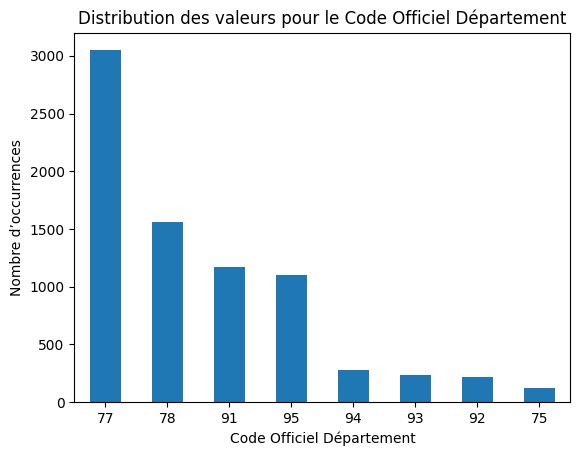

In [101]:
df_legal['Code Officiel Département'].value_counts().plot(kind='bar')

plt.title('Distribution des valeurs pour le Code Officiel Département')
plt.xlabel('Code Officiel Département')
plt.ylabel('Nombre d’occurrences')
plt.xticks(rotation=0)  # Garder les étiquettes des axes horizontales pour une meilleure lisibilité
plt.show()

# SDAP arret associés

In [102]:
df_arret = pd.read_csv('./CSVàVerif/sdap-arrets-associes.csv', delimiter=';')
df_arret.head()

,route_id,route_long_name,stop_id,stop_name,OperatorName,ArRTown,ArRPostalRegion,stop_Geopoint,ArRXEpsg2154,ArRYEpsg2154,plans,schedules,Pointgeo,Nom_commune,Code_insee,ArRAccessibility,ArRAudibleSignals,ArRVisualSigns
0,IDFM:C01224,210,IDFM:26032,Route de Bry - Aristide Briand,RATP,Villiers-sur-Marne,94079.0,"48.831472659793114, 2.5345238459542",665830.0,6859147.0,"[{""link"": ""https://www.ratp.fr/sites/default/f...","[{""routeId"": ""route:IDFM:C01224-outbound"", ""fr...","48.831472659806835, 2.5345238459542",Villiers-sur-Marne,94079,true,unknown,unknown
1,IDFM:C01224,210,IDFM:26015,Chemin des Moines,RATP,Bry-sur-Marne,94015.0,"48.84066851634038, 2.528773750648405",665414.0,6860172.0,"[{""link"": ""https://www.ratp.fr/sites/default/f...","[{""routeId"": ""route:IDFM:C01224-outbound"", ""fr...","48.84066851635407, 2.528773750648405",Bry-sur-Marne,94015,true,unknown,unknown
2,IDFM:C01224,210,IDFM:37819,Mairie,RATP,Le Perreux-sur-Marne,94058.0,"48.84013257243363, 2.5073604081274974",663842.0,6860122.0,"[{""link"": ""https://www.ratp.fr/sites/default/f...","[{""routeId"": ""route:IDFM:C01224-outbound"", ""fr...","48.84013257244734, 2.507360408127498",Le Perreux-sur-Marne,94058,true,unknown,unknown
3,IDFM:C01225,211,IDFM:41427,Gare de Noisiel,RATP,Noisiel,77337.0,"48.84379527347943, 2.616004498997627",671818.0,6860485.0,"[{""link"": ""https://www.ratp.fr/sites/default/f...","[{""routeId"": ""route:IDFM:C01225-outbound"", ""fr...","48.843795273493136, 2.6160044989976274",Noisiel,77337,true,unknown,unknown
4,IDFM:C01225,211,IDFM:25929,Jules Ferry,RATP,Noisiel,77337.0,"48.85110503653551, 2.626784554585665",672613.0,6861294.0,"[{""link"": ""https://www.ratp.fr/sites/default/f...","[{""routeId"": ""route:IDFM:C01225-outbound"", ""fr...","48.85110503654919, 2.626784554585665",Noisiel,77337,true,unknown,unknown


## données deja dispo dans API

# Traffic annuel entrant par station

In [ ]:
df_arret = pd.read_csv('./CSVàVerif/trafic-annuel-entrant-par-station-du-reseau-ferre-2017.csv', delimiter=';')
df_arret.head()